<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/NLP/Lesson%208.%20Classification/3_0_2_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Линейная классификация

Классификация — это задача, в которой необходимо разделить объекты на несколько классов. Для начала сосредоточимся на **бинарной классификации**, когда объекты делятся на два класса. Этот подход легко обобщить на классификацию с $K$-классами, но базовые принципы лучше рассмотреть на более простом примере.

#### Постановка задачи

Пусть целевые значения $y$ кодируют принадлежность объекта к одному из двух классов. Для удобства будем использовать метки из множества $\{-1, 1\}$, хотя в практике нередко встречаются и другие обозначения, например $\{0, 1\}$. Входные данные $x$ представляют собой векторы признаков из пространства $\mathbb{R}^D$. Задача состоит в том, чтобы построить **линейную модель**, которая сможет разделять эти два класса.

Линейная модель задаёт гиперплоскость в пространстве признаков, которая делит объекты классов. Математически она описывается выражением:

$$
f(x) = \langle w, x \rangle + b,
$$

где $w$ — вектор весов, определяющий ориентацию гиперплоскости, а $b$ — смещение, определяющее её положение. Решение классификации сводится к проверке знака этой функции:

$$
y = \text{sign}(f(x)) = \text{sign}(\langle w, x \rangle + b).
$$

Если $f(x) > 0$, объект относится к классу $1$; если $f(x) < 0$, к классу $-1$.





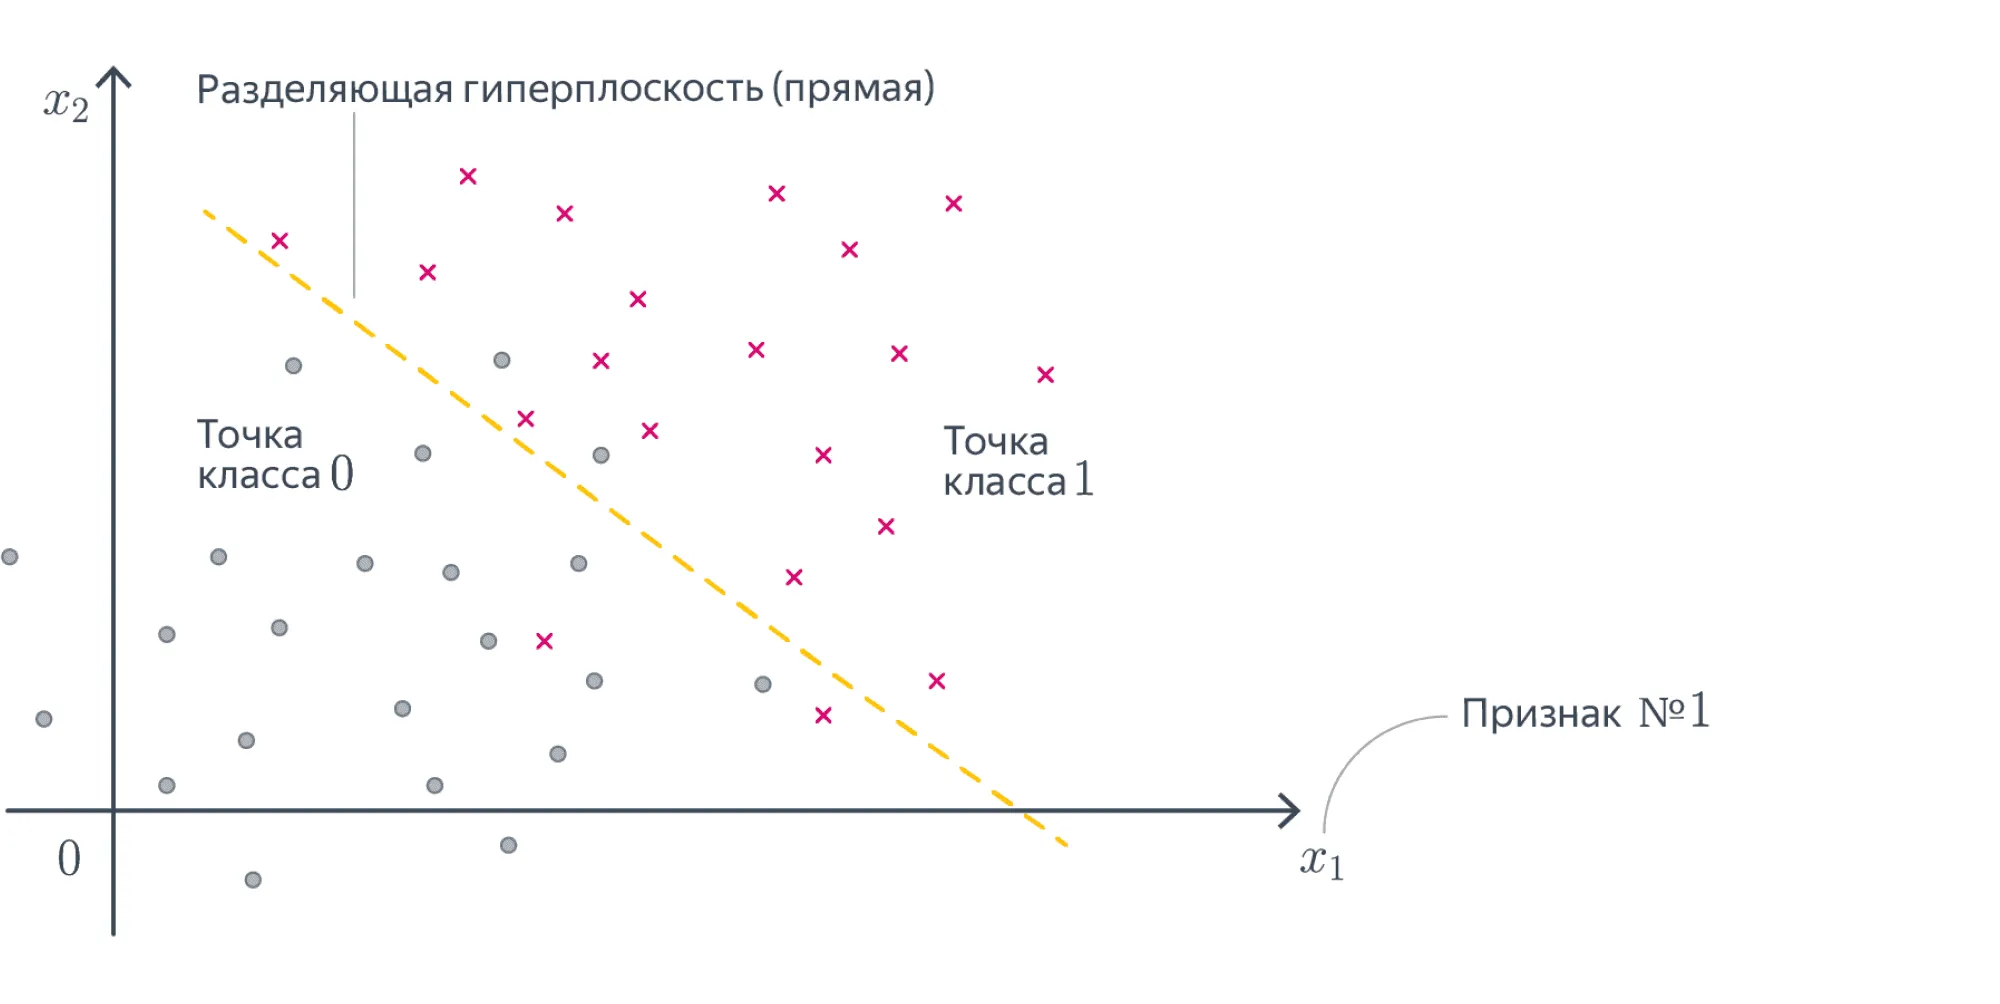

#### Линейно разделимые данные

В идеальной ситуации найдётся такая гиперплоскость, которая полностью разделит два класса: все объекты положительного класса окажутся по одну сторону от неё, а отрицательного — по другую. Если данные можно разделить таким образом, то такая выборка называется **линейно разделимой**.

Однако в реальной жизни линейно разделимые данные встречаются крайне редко. Классы часто частично перекрываются, что требует создания моделей, способных учитывать это перекрытие. Это, в свою очередь, приводит к необходимости использовать более сложные подходы: добавлять регуляризацию, строить нелинейные модели или переходить в пространства с более высоким числом измерений.



#### Как обучить линейную модель?

Мы ещё обсудим, как именно обучить линейную модель, чтобы найти параметры $w$ и $b$. Однако принцип работы уже понятен: итоговое предсказание будет вычисляться по формуле

$$
y = \text{sign}(\langle w, x_i \rangle + b),
$$

где $\langle w, x_i \rangle$ обозначает скалярное произведение векторов.



### Вопрос для размышления: почему нельзя использовать регрессию для классификации?

Идея может показаться простой: попробовать решать задачу классификации как задачу регрессии, предсказывая значения $-1$ и $1$, а затем брать знак предсказания. Для этого можно минимизировать, например, среднеквадратичную ошибку (MSE). Однако такой подход плохо работает по нескольким причинам:

1. **Слабое наказание за ошибки вблизи гиперплоскости.**  
   Регрессия минимизирует разницу между предсказанным и истинным значением, но не учитывает расположение объектов относительно разделяющей гиперплоскости. Например, объект с истинной меткой $1$, для которого модель предсказывает $-0.1$, практически не будет штрафоваться в регрессии, хотя для классификации это серьёзная ошибка.

2. **Игнорирование сути классификации.**  
   В регрессии важна точность предсказанных значений, а в классификации — только знак. Например, предсказание $5$ вместо $1$ для регрессии является большой ошибкой, но для классификации это не имеет значения, так как знак верный.

3. **Искажение разделяющей гиперплоскости.**  
   Регрессия стремится аппроксимировать числовые значения, а не разделять классы. Это может привести к тому, что разделяющая гиперплоскость будет построена неоптимально: некоторые объекты окажутся по неверную сторону, даже если класс можно разделить лучше.



#### Визуализация проблемы

Если визуализировать решение задачи классификации через регрессию, становится очевидно, что гиперплоскость плохо отражает распределение классов. Например, точки, сильно удалённые от разделяющей границы, могут доминировать в определении модели, так как их вклад в MSE велик. В результате плоскость может отклоняться, чтобы лучше аппроксимировать эти точки, что ухудшает качество классификации вблизи границы.



#### Итог

Использование регрессии для задачи классификации — неэффективно. Это объясняется тем, что регрессия оптимизирует другие метрики, игнорируя ключевые аспекты классификации: строгое разделение классов и ориентацию на знак предсказания. Для классификации лучше использовать специализированные методы, такие как логистическая регрессия, метод опорных векторов (SVM) или деревья решений.






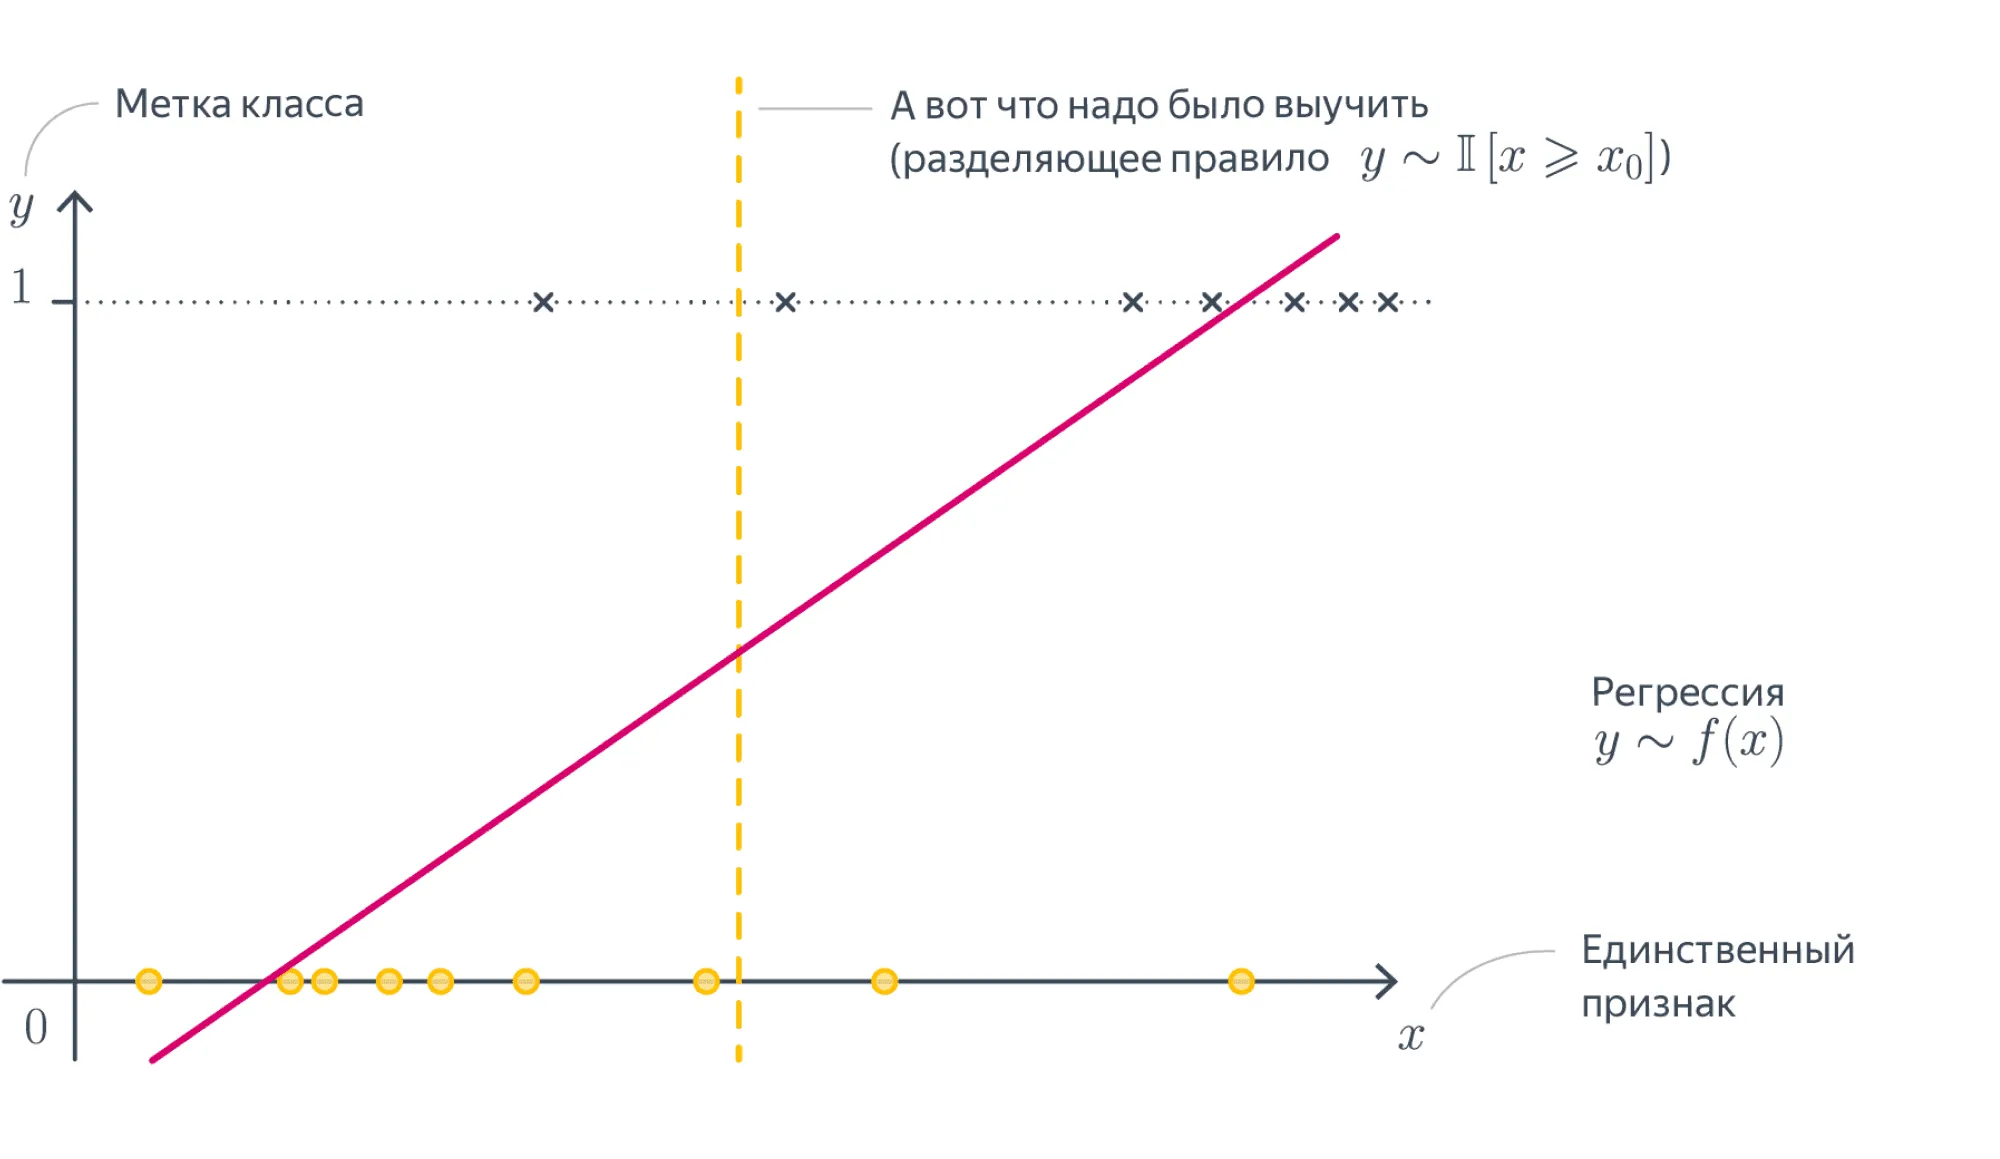


### Сконструируем функционал ошибки

Теперь давайте сосредоточимся на том, как сконструировать функцию ошибки для линейной классификации, чтобы она не сталкивалась с проблемами, которые мы обсуждали ранее. Мы хотим минимизировать количество ошибок, которые делает наш классификатор.

Для этого определим ошибку как функцию, которая принимает значение 1, если классификация неверная (то есть предсказание не совпало с реальной меткой), и 0, если предсказание правильное:

$$
\sum_{i} I[y_i \neq \text{sign}(\langle w, x_i \rangle)] \rightarrow \min_w
$$

Здесь $I[\cdot]$ — это индикаторная функция, которая равна 1, если условие внутри неё выполняется, и 0 — если нет. Таким образом, мы суммируем все ошибки на обучающих примерах, и наша цель — минимизировать эту сумму. Однако есть одна важная проблема с такой функцией: она **нед differentiable (недифференцируема)**, что делает её неподходящей для оптимизации с помощью градиентных методов, таких как градиентный спуск.

#### Давайте упростим ошибку

Чтобы исправить эту проблему, можно немного преобразовать ошибку. Домножим обе части выражения на $y_i$, и это даст нам следующее:

$$
\sum_{i} I[y_i \langle w, x_i \rangle < 0] \rightarrow \min_w
$$

Здесь мы получаем выражение, которое проще анализировать. Величина $M_i = y_i \langle w, x_i \rangle$ называется **отступом** (margin). Отступ показывает, насколько уверенно классификатор классифицирует объект:

- Если $M_i > 0$, то класс предсказан верно, и чем больше $M_i$, тем дальше объект от разделяющей гиперплоскости, то есть классификатор уверен в своём предсказании.
- Если $M_i < 0$, то класс предсказан неверно. И чем больше по модулю величина $M_i$, тем сильнее ошибка классификатора.

Таким образом, минимизация ошибки сводится к минимизации числа объектов с отрицательным отступом, что напрямую связано с уменьшением числа неправильных классификаций.

#### Misclassification Loss

Функция потерь, которую мы только что описали, называется **misclassification loss** (потери от неправильной классификации). Важно заметить, что эта функция имеет разрыв (она кусочно-постоянная): она принимает значение 1, если предсказание неверно, и 0 — если верно. Таким образом, её производная равна нулю во всех точках, где она существует, и эта особенность делает её трудной для использования в градиентных методах оптимизации.

### Мажорирование функции потерь

Чтобы использовать градиентный спуск для оптимизации, нам нужно заменить кусочно-постоянную функцию на более гладкую, которая будет иметь ненулевую производную и позволять эффективно находить минимумы. Для этого можно использовать более "мягкие" функции, которые приближенно, но достаточно точно, описывают поведение **misclassification loss**.

#### Пример 1: Логистическая регрессия

Один из таких методов — это **логистическая регрессия**, где для каждого примера вычисляется вероятность принадлежности к положительному классу. Функция потерь в этом случае — это **кросс-энтропия**, которая является гладкой функцией и позволяет эффективно минимизировать ошибку с помощью градиентного спуска.

#### Пример 2: Hinge Loss (отступная потеря)

Другой популярной функцией потерь является **hinge loss** (отступная потеря), которая используется в методах опорных векторов (SVM). Она выглядит следующим образом:

$$
L(y_i, \hat{y}_i) = \max(0, 1 - y_i \langle w, x_i \rangle)
$$

Здесь $y_i$ — это истинная метка, $\hat{y}_i$ — предсказание модели. Эта функция штрафует классификатор за объекты, которые либо классифицированы неверно, либо находятся слишком близко к разделяющей гиперплоскости. При этом если объект классифицирован правильно и его отступ достаточно большой ($1 - y_i \langle w, x_i \rangle > 0$), то штраф отсутствует.

#### Пример 3: Квадратичные потери

Ещё одна возможность — это использование **квадратичной потери** (к примеру, MSE), хотя она не идеальна для классификации, как мы уже обсуждали. Однако в некоторых случаях её использование оправдано, особенно для задач, где классы пересекаются.

Таким образом, для того чтобы научить классификатор работать эффективно и избегать проблем с кусочно-постоянными функциями ошибок, мы заменяем их на более гладкие функции, такие как **логистическая регрессия** или **hinge loss**. Эти функции позволяют использовать стандартные методы оптимизации, такие как градиентный спуск, для нахождения оптимальных весов модели.


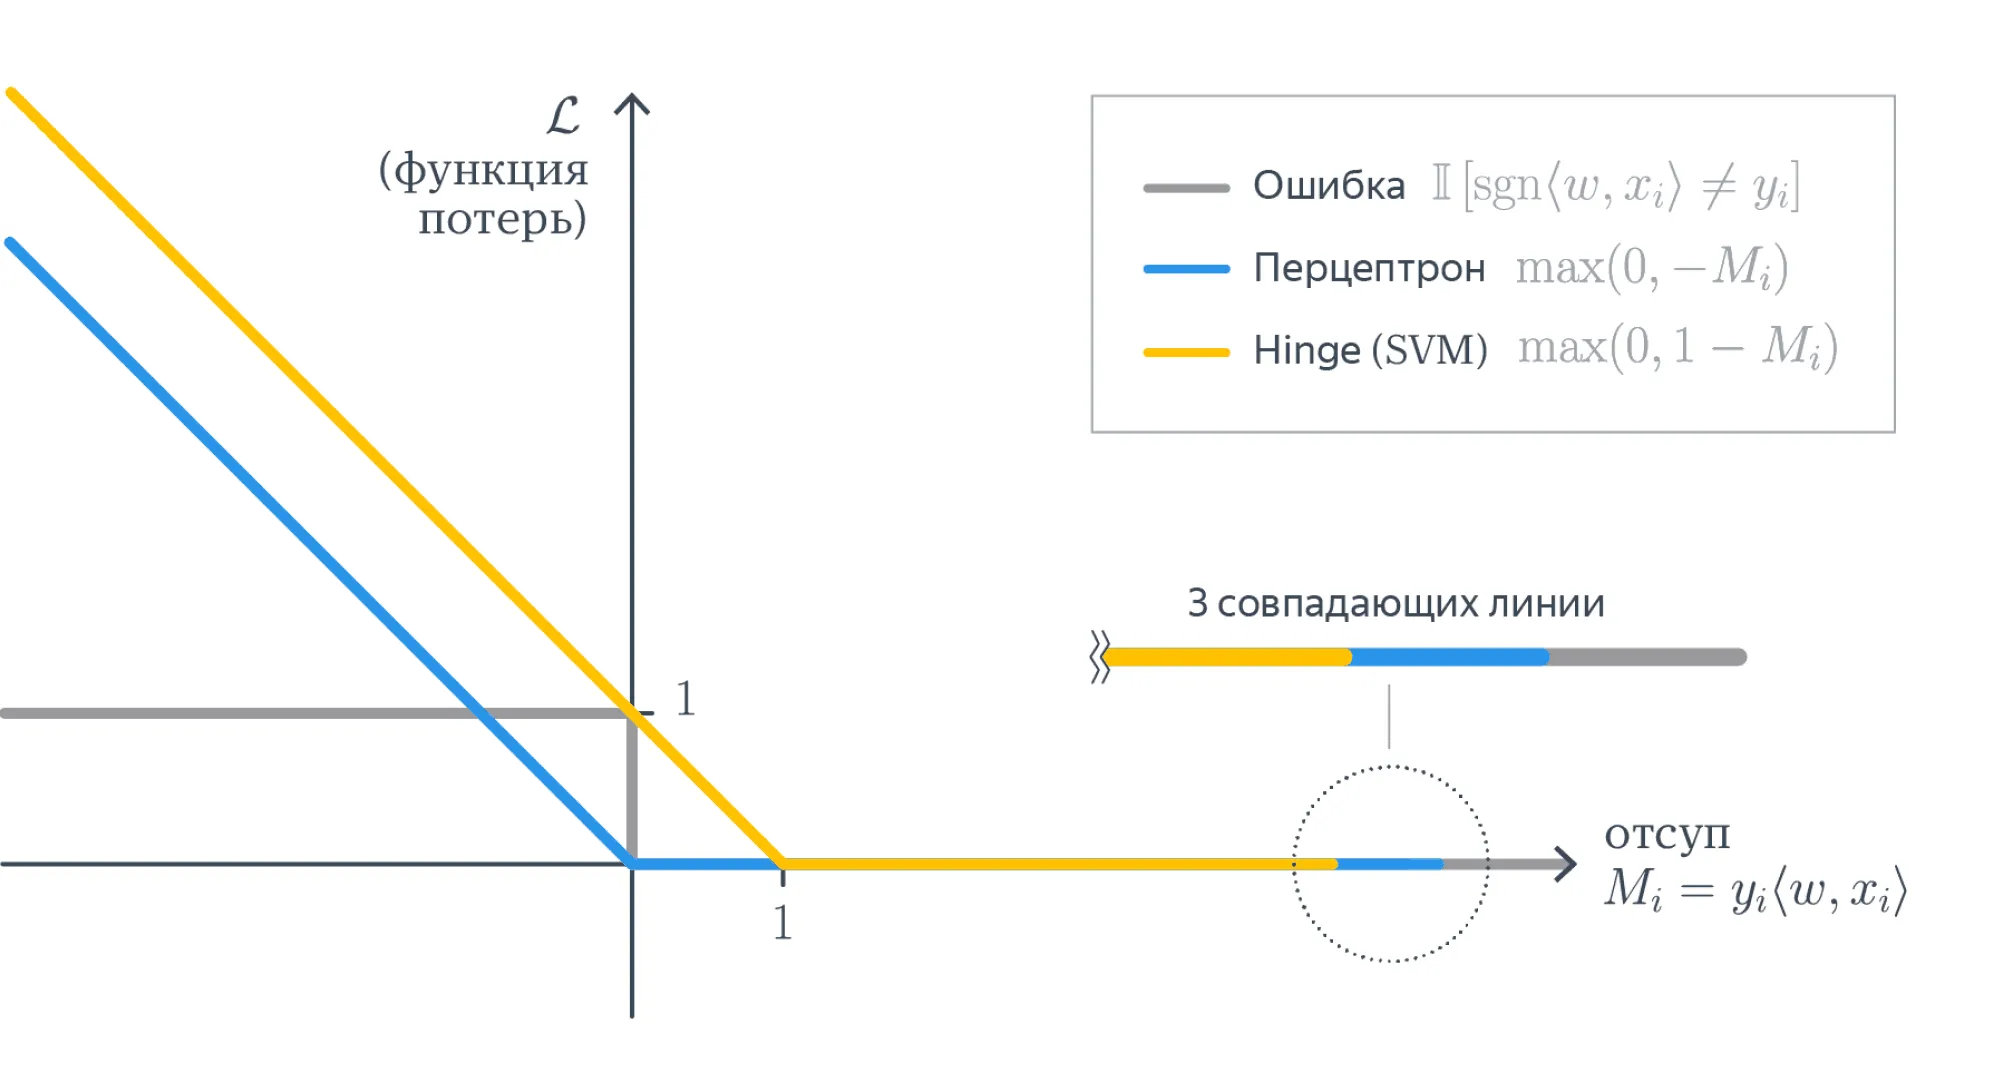



### Вопрос на подумать

**Вопрос:** Допустим, мы как-то обучили классификатор, и подавляющее большинство отступов оказались отрицательными. Правда ли, что нас постигла катастрофа?

**Ответ:** Наверное, мы что-то сделали не так, но это не обязательно катастрофа. Если большинство отступов отрицательные, это может означать, что наша модель классифицирует объекты противоположным образом (то есть предсказывает класс, противоположный действительному). В таком случае ситуацию можно локально выправить: если мы просто поменяем предсказания на противоположные, то результат может стать значительно лучше. Конечно, это лишь временное исправление, и проблема может заключаться в том, что модель сильно переобучена или плохо настроена. Однако, это сигнал о том, что важно проанализировать модель более глубоко.



### Вопрос на подумать

**Вопрос:** Предположим, что у нас есть два классификатора с примерно одинаковыми и достаточно приемлемыми значениями интересующей нас метрики. При этом одна модель почти всегда выдаёт предсказания с большими по модулю отступами, а вторая — с относительно маленькими. Верно ли, что первая модель лучше, чем вторая?

**Ответ:** На первый взгляд может показаться, что первая модель действительно лучше: ведь она предсказывает «увереннее», то есть имеет большие отступы. Однако, на практике всё не так однозначно. Иногда модель с большими отступами может ошибаться, будучи слишком уверенной в своих предсказаниях, даже если данные говорят об обратном. В то же время, модель, которая выдает меньшие отступы, может быть более гибкой и честно признавать, когда она не уверена в своём ответе, что в некоторых случаях является предпочтительным. Такая модель может «отказаться» от классификации, если уверенность слишком низкая, что в ряде ситуаций приведет к лучшим результатам.

То есть, не всегда та модель, которая уверена в своём предсказании, является лучшей. Важно учитывать контекст задачи и подход к обработке ошибок. Например, в задачах, где ошибка классификации может дорого стоить, предпочтительней будет модель, которая не делает категоричных ошибок, даже если это означает более частое признание неуверенности в ответе.











### Ошибка перцептрона

Перцептрон является одной из самых простых и первых моделей для решения задачи линейной классификации. В этой модели ошибка определяется с учетом **отступа** (margin), который отражает расстояние между объектами и разделяющей гиперплоскостью. Однако, если учитывать отступы только на ошибочных классификациях, то это может быть недостаточно информативно. Поэтому давайте расширим нашу модель, чтобы она учитывала **не только факт ошибки, но и степень ошибки**.

#### Что такое отступ?

Отступ (margin) — это величина, которая описывает расстояние между объектом и разделяющей гиперплоскостью, которую задаёт классификатор. Если объект правильно классифицирован, то его отступ будет положительным, если классификация неправильная — отступ будет отрицательным. Формально отступ для объекта $i$ можно вычислить как:

$$
M_i = y_i \langle w, x_i \rangle
$$

- $y_i$ — истинная метка объекта (в бинарной классификации $y_i$ может быть $+1$ или $-1$).
- $x_i$ — вектор признаков объекта $i$.
- $w$ — вектор весов модели, определяющий разделяющую гиперплоскость.
- $\langle w, x_i \rangle$ — скалярное произведение вектора признаков $x_i$ и вектора весов $w$.

Когда классификатор делает ошибку, отступ для этого объекта будет отрицательным, то есть классификатор помещает объект на ту сторону гиперплоскости, которая не соответствует его истинной метке. Чем больше по величине (по модулю) отрицательный отступ, тем более уверенно классификатор ошибается.



#### Пропорциональность величине отступа

Идея состоит в том, чтобы учитывать отступы не бинарно (то есть просто как факт ошибки), а линейно, пропорционально величине отступа. Это позволяет более точно учитывать, насколько сильно классификатор ошибся в предсказании. Чем больше по модулю отступ, тем сильнее ошибка классификатора.

Определим **функцию потерь** (loss function) для перцептрона следующим образом:

$$
F(M) = \max(0, -M)
$$

где $M$ — это отступ, который вычисляется как $M = y_i \langle w, x_i \rangle$, где:
- $y_i$ — это истинная метка объекта (либо $+1$, либо $-1$),
- $\langle w, x_i \rangle$ — это скалярное произведение вектора весов $w$ и вектора признаков объекта $x_i$.

**Функция потерь** $F(M)$ будет равна 0, если объект классифицирован правильно, то есть если отступ $M > 0$. Если отступ $M$ отрицателен, то есть классификация ошибочна, функция потерь принимает значение $-M$. Таким образом, функция потерь линейно пропорциональна величине ошибки: чем больше ошибка, тем больше вклад этой ошибки в итоговую сумму.

### Функция потерь с L2-регуляризацией

Теперь добавим **L2-регуляризацию**, чтобы контролировать величину весов и предотвратить переобучение. Включение регуляризации помогает модели быть более обобщённой и снижает вероятность излишней подгонки к обучающим данным.

Общая форма функции потерь с регуляризацией будет выглядеть так:

$$
L(w, x, y) = \lambda \|w\|^2_2 + \sum_i \max(0, -y_i \langle w, x_i \rangle)
$$

Где:
- $\lambda \|w\|_2^2$ — это L2-регуляризация, которая штрафует модель за большие веса. Чем больше веса, тем сильнее будет штраф.
- $\sum_i \max(0, -y_i \langle w, x_i \rangle)$ — это сумма потерь на ошибочных классификациях. Для каждого объекта $i$ мы учитываем величину ошибки, если классификация была неверной.

### Задача: Найти градиент функции потерь

Для оптимизации модели нам нужно вычислить градиент функции потерь по отношению к весам $w$. Это позволит использовать **метод градиентного спуска** (или его стохастическую версию, **SGD**) для обновления весов.

#### Разложение функции потерь

1. **Регуляризация:** $\lambda \|w\|_2^2$

Градиент от регуляризационной части функции потерь:

$$
\nabla_w (\lambda \|w\|_2^2) = 2 \lambda w
$$

2. **Функция потерь на ошибках:** $\sum_i \max(0, -y_i \langle w, x_i \rangle)$

Здесь, в зависимости от того, была ли классификация правильной или нет, градиент вычисляется по-разному:

- Если точка классифицирована **верно**, то есть $y_i \langle w, x_i \rangle > 0$, то вклад этой точки в функцию потерь равен 0, и градиент для этой точки будет равен 0.
- Если точка классифицирована **неверно**, то есть $y_i \langle w, x_i \rangle \leq 0$, то вклад этой точки в функцию потерь равен $-y_i \langle w, x_i \rangle$. Для таких точек градиент будет равен $-y_i x_i$, поскольку производная от $-y_i \langle w, x_i \rangle$ по $w$ даёт $-y_i x_i$.

### Вычисление градиента

Теперь вычислим полный градиент функции потерь по весам $w$.

1. **Градиент от регуляризации:**

$$
\nabla_w (\lambda \|w\|_2^2) = 2 \lambda w
$$

2. **Градиент от ошибок классификации:**

Для каждой точки $i$:
- Если $y_i \langle w, x_i \rangle > 0$, то $\max(0, -y_i \langle w, x_i \rangle) = 0$, и градиент для этой точки равен 0.
- Если $y_i \langle w, x_i \rangle \leq 0$, то $\max(0, -y_i \langle w, x_i \rangle) = -y_i \langle w, x_i \rangle$, и градиент будет равен $-y_i x_i$.

Таким образом, полный градиент функции потерь по весам $w$ можно выразить так:

$$
\nabla_w L(w, x, y) = 2 \lambda w + \sum_i \left\{
\begin{array}{ll}
0 & \text{если } y_i \langle w, x_i \rangle > 0 \\
- y_i x_i & \text{если } y_i \langle w, x_i \rangle \leq 0
\end{array}
\right.
$$

### Применение стохастического градиентного спуска (SGD)

Теперь, когда у нас есть аналитическая форма для градиента, мы можем использовать **метод стохастического градиентного спуска** (SGD) для обновления весов модели. В методе SGD обновление весов происходит следующим образом:

$$
w \leftarrow w - \eta \nabla_w L(w, x, y)
$$

где:
- $\eta$ — это **скорость обучения**, параметр, который контролирует размер шага, на который обновляются веса.
- $\nabla_w L(w, x, y)$ — это градиент функции потерь по весам $w$.

Процесс обучения заключается в том, что для каждого примера (или мини-батча) вычисляется градиент, и веса обновляются в направлении, противоположном градиенту, с целью минимизировать функцию потерь.

### История ошибки перцептрона

Предложенная функция потерь была впервые предложена для **перцептрона** Франком Розенблаттом в 1958 году. Это была одна из первых вычислительных моделей нейронных сетей, и она положила начало развитию машинного обучения и искусственного интеллекта. Перцептрон решает задачу линейной классификации и используется для классификации объектов, разделяемых гиперплоскостью. Однако, несмотря на свою простоту, его решение зависит от начальных значений весов, что приводит к различиям в решениях для разных начальных условий. Это подчеркивает важность правильной инициализации параметров модели.

### Пример

Предположим, что мы обучили несколько классификаторов с одинаковым значением нулевого лосса (нулевой ошибки) на обучающих данных. Однако, каждый из этих классификаторов может иметь разные веса, что приводит к различным разделяющим гиперплоскостям. Это означает, что несмотря на одинаковую ошибку на обучающих данных, классификаторы могут различаться по структуре и быть более или менее эффективными при классификации новых данных. Этот факт подчеркивает важность правильной инициализации и выбора начальных значений параметров модели.

Таким образом, хотя ошибка перцептрона и является важным шагом в развитии машинного обучения, она имеет свои ограничения, связанные с зависимостью от начальных параметров и линейностью решения. Тем не менее, она сыграла ключевую роль в развитии более сложных методов, таких как многослойные нейронные сети и глубокое обучение.



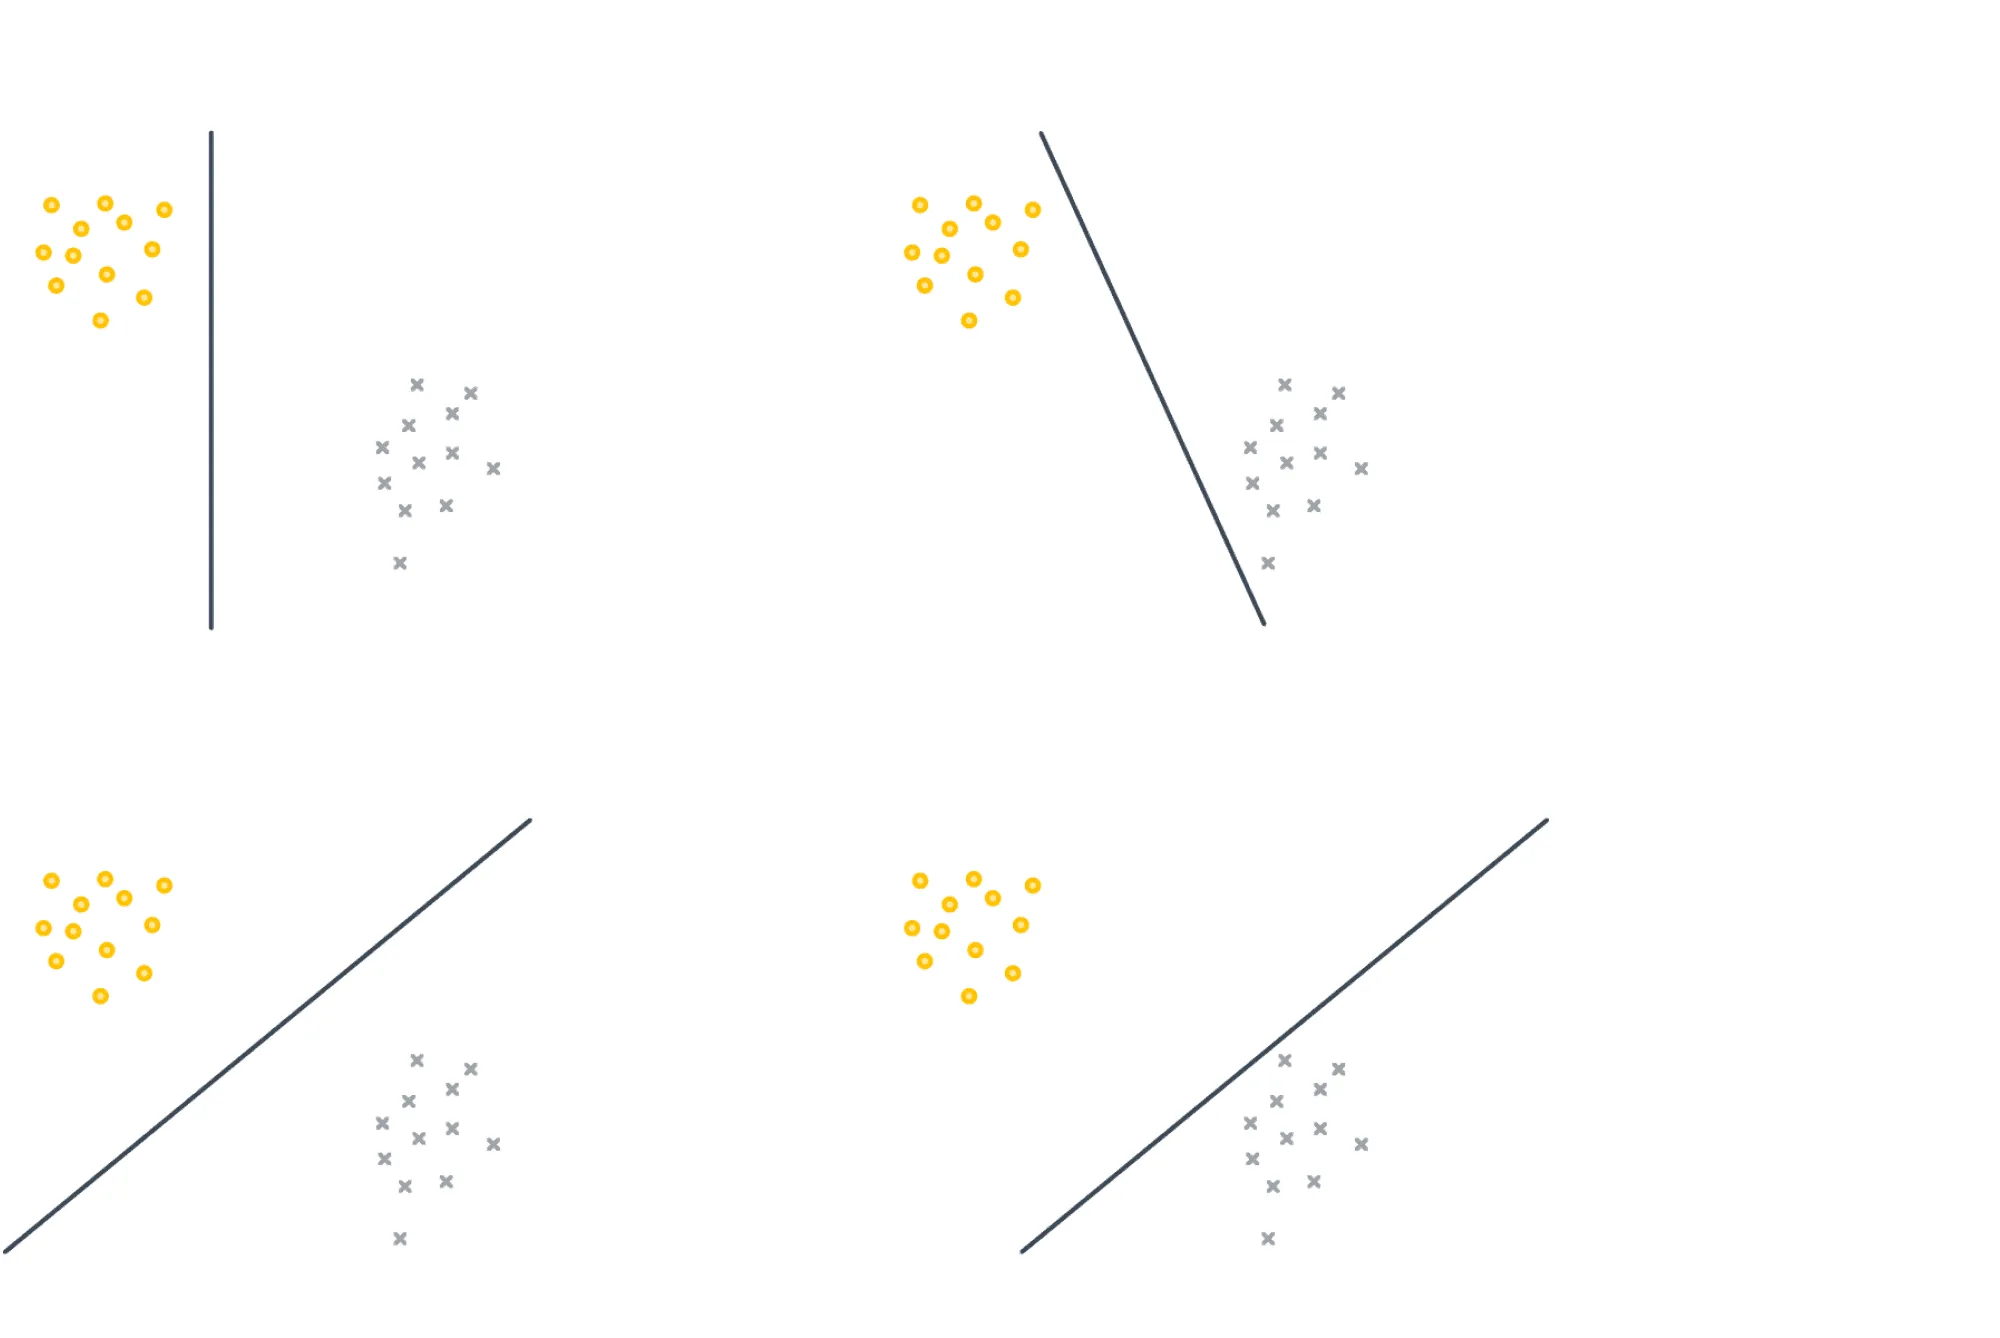


# Hinge Loss и Метод Опорных Векторов (SVM)

Для задач, аналогичных той, что изображена на картинке выше, возникает естественное стремление не только найти разделяющую прямую, но и провести её так, чтобы она располагалась на одинаковом удалении от обоих классов. То есть, наша цель — максимизировать минимальный отступ.

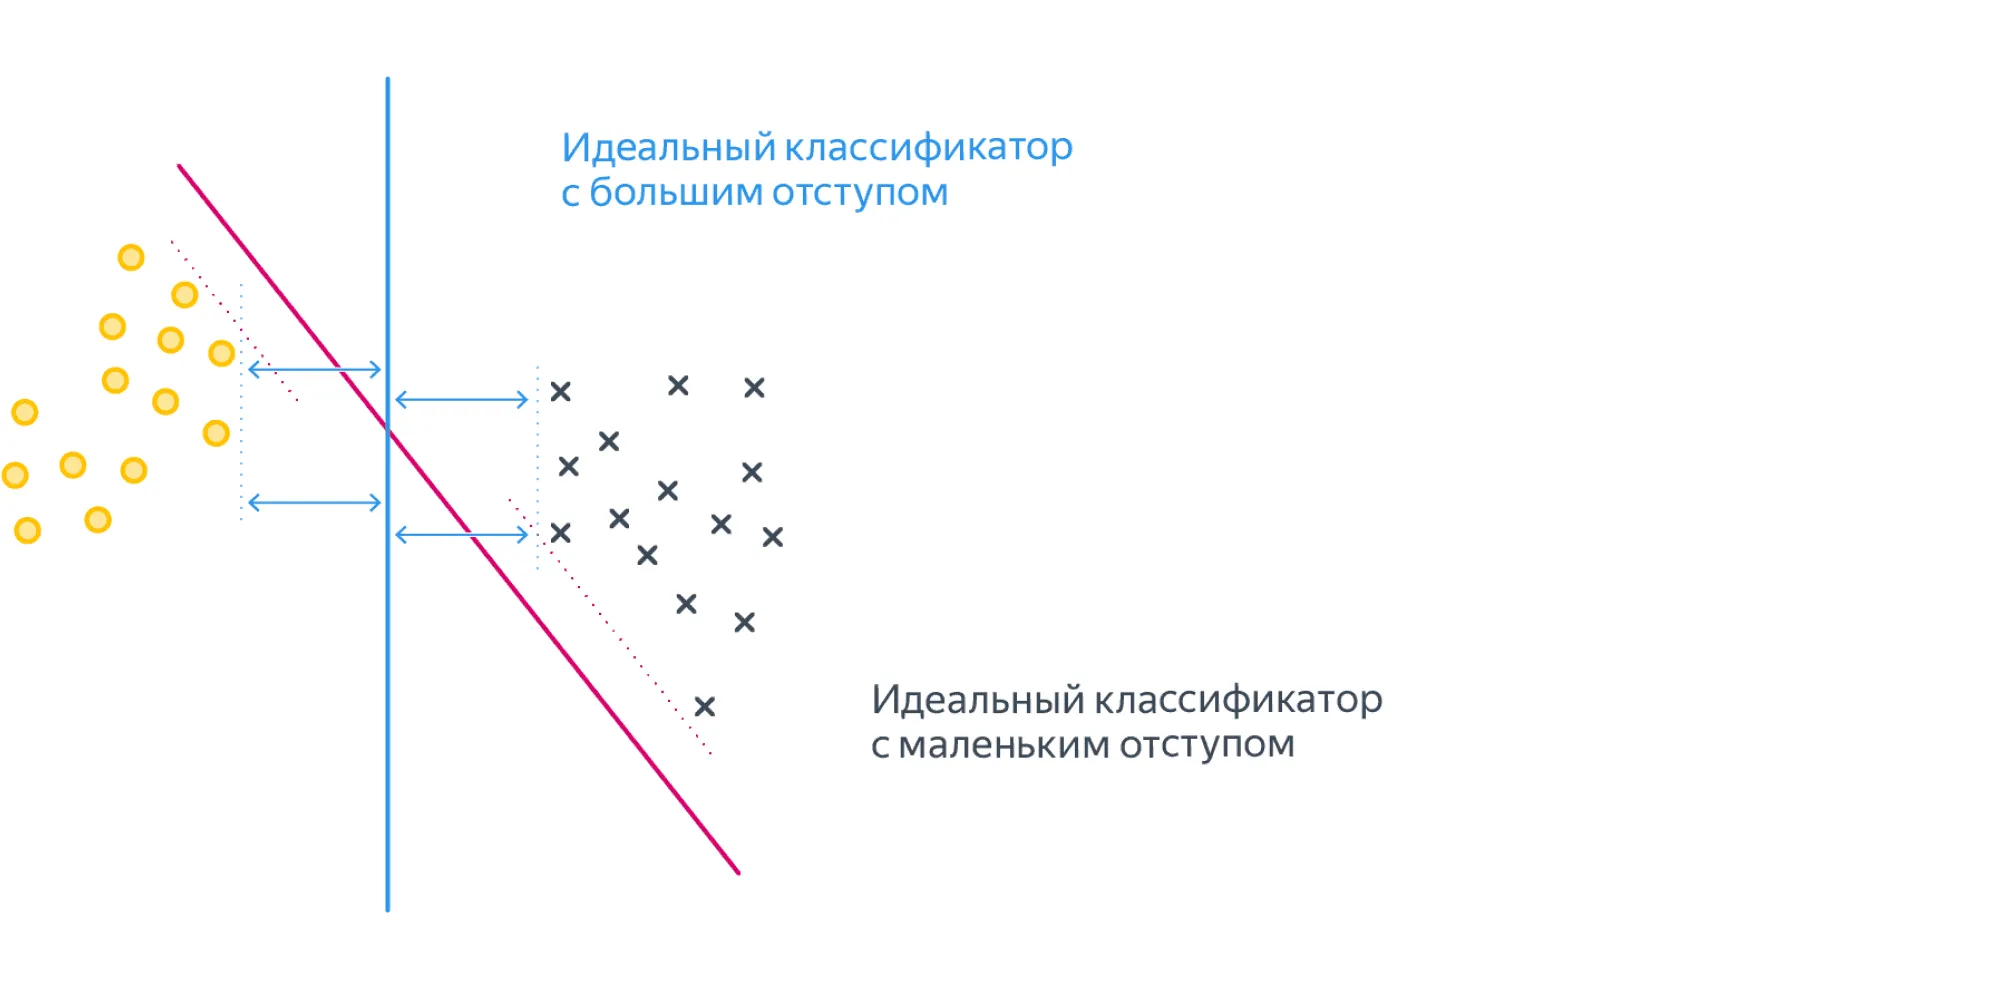



Для этого необходимо немного модифицировать функцию ошибки, задав её в следующем виде:

$$
F(M) = \max(0, 1 - M)
$$

Тогда для всего алгоритма, с учётом регуляризации, функция потерь примет вид:

### 1. Функция потерь для SVM

Функция потерь SVM с регуляризацией и hinge loss выглядит следующим образом:

$$
L(w, x, y) = \lambda \|w\|^2_2 + \sum_{i} \max(0, 1 - y_i \langle w, x_i \rangle)
$$

где:
- $w$ — вектор весов (параметры модели),
- $x_i$ — вектор признаков $i$-го объекта,
- $y_i$ — метка класса для объекта $i$ ($y_i \in \{-1, +1\}$),
- $\lambda$ — коэффициент регуляризации,
- $\langle w, x_i \rangle$ — скалярное произведение вектора весов $w$ и вектора признаков $x_i$.

Первая часть выражения, $\lambda \|w\|^2_2$, — это **регуляризация** для предотвращения переобучения (чем меньше весов, тем более обобщённой будет модель). Вторая часть, $\sum_{i} \max(0, 1 - y_i \langle w, x_i \rangle)$, — это **hinge loss**, который штрафует за объекты, находящиеся слишком близко к разделяющей гиперплоскости или ошибочно классифицированные.

### 2. Градиент по весам $w$

Теперь вычислим градиент этой функции по весам $w$, чтобы можно было применить метод градиентного спуска для минимизации функции потерь.

Для этого разобьем функцию потерь на два слагаемых:

- **Регуляризация**: $\lambda \|w\|^2_2$
- **Hinge Loss**: $\sum_{i} \max(0, 1 - y_i \langle w, x_i \rangle)$

#### 2.1. Градиент регуляризационного члена

Градиент от регуляризующего слагаемого $\lambda \|w\|^2_2$ (где $\|w\|_2^2 = w_1^2 + w_2^2 + \dots + w_d^2$) легко вычисляется как:

$$
\nabla_w \left( \lambda \|w\|^2_2 \right) = 2\lambda w
$$

#### 2.2. Градиент от hinge loss

Теперь вычислим градиент второй части — от hinge loss.

$$
\sum_{i} \max(0, 1 - y_i \langle w, x_i \rangle)
$$

Для этого разобьем выражение на два случая:

1. **Когда $1 - y_i \langle w, x_i \rangle > 0$**:
   - Это означает, что $y_i \langle w, x_i \rangle < 1$, то есть объект либо неправильно классифицирован, либо классифицирован с недостаточной уверенностью.
   - В этом случае функция $\max(0, 1 - y_i \langle w, x_i \rangle) = 1 - y_i \langle w, x_i \rangle$.
   - Градиент по $w$ будет:

$$
\nabla_w \left( 1 - y_i \langle w, x_i \rangle \right) = -y_i x_i
$$

2. **Когда $1 - y_i \langle w, x_i \rangle \leq 0$**:
   - Это означает, что $y_i \langle w, x_i \rangle \geq 1$, то есть объект правильно классифицирован с достаточной уверенностью.
   - В этом случае функция $\max(0, 1 - y_i \langle w, x_i \rangle) = 0$.
   - Градиент будет равен нулю:

$$
\nabla_w \left( 0 \right) = 0
$$

Итак, для каждого объекта $i$, градиент этой части функции потерь равен:

$$
\nabla_w \left( \max(0, 1 - y_i \langle w, x_i \rangle) \right) =
\begin{cases}
0, & \text{если} \ 1 - y_i \langle w, x_i \rangle \leq 0 \\
-y_i x_i, & \text{если} \ 1 - y_i \langle w, x_i \rangle > 0
\end{cases}
$$

#### 2.3. Общий градиент

Теперь мы можем выразить общий градиент функции потерь $L(w, x, y)$ по весам $w$. Он будет равен сумме градиентов от регуляризационного и hinge loss слагаемых:

$$
\nabla_w L(w, x, y) = 2\lambda w + \sum_{i} \nabla_w \left( \max(0, 1 - y_i \langle w, x_i \rangle) \right)
$$

Подставляем выражение для градиента от hinge loss:

$$
\nabla_w L(w, x, y) = 2\lambda w + \sum_{i}
\begin{cases}
0, & \text{если} \ 1 - y_i \langle w, x_i \rangle \leq 0 \\
-y_i x_i, & \text{если} \ 1 - y_i \langle w, x_i \rangle > 0
\end{cases}
$$

#### 3. Общий градиент

Теперь можем объединить градиенты всех частей и получить общий градиент функции потерь $L(w, x, y)$ по весам $w$:

$$
\nabla_w L(w, x, y) = 2\lambda w + \sum_{i} \nabla_w \left( \max(0, 1 - y_i \langle w, x_i \rangle) \right)
$$

Подставим вычисленные градиенты для каждого объекта:

$$
\nabla_w L(w, x, y) = 2\lambda w + \sum_{i: 1 - y_i \langle w, x_i \rangle > 0} (-y_i x_i)
$$

Таким образом, градиент функции потерь по весам $w$ для метода опорных векторов с hinge loss выглядит следующим образом:

$$
\nabla_w L(w, x, y) = 2\lambda w + \sum_{i: 1 - y_i \langle w, x_i \rangle > 0} (-y_i x_i)
$$

### Как это работает?

- **Первое слагаемое**: $2\lambda w$ — это регуляризация, которая помогает предотвратить переобучение, уменьшив величину весов.
- **Второе слагаемое**: $\sum_{i: 1 - y_i \langle w, x_i \rangle > 0} (-y_i x_i)$ — это наказание за объекты, которые либо находятся слишком близко к разделяющей гиперплоскости, либо классифицированы неверно. Эта часть обновляет веса, заставляя модель корректировать разделяющую гиперплоскость для улучшения классификации.



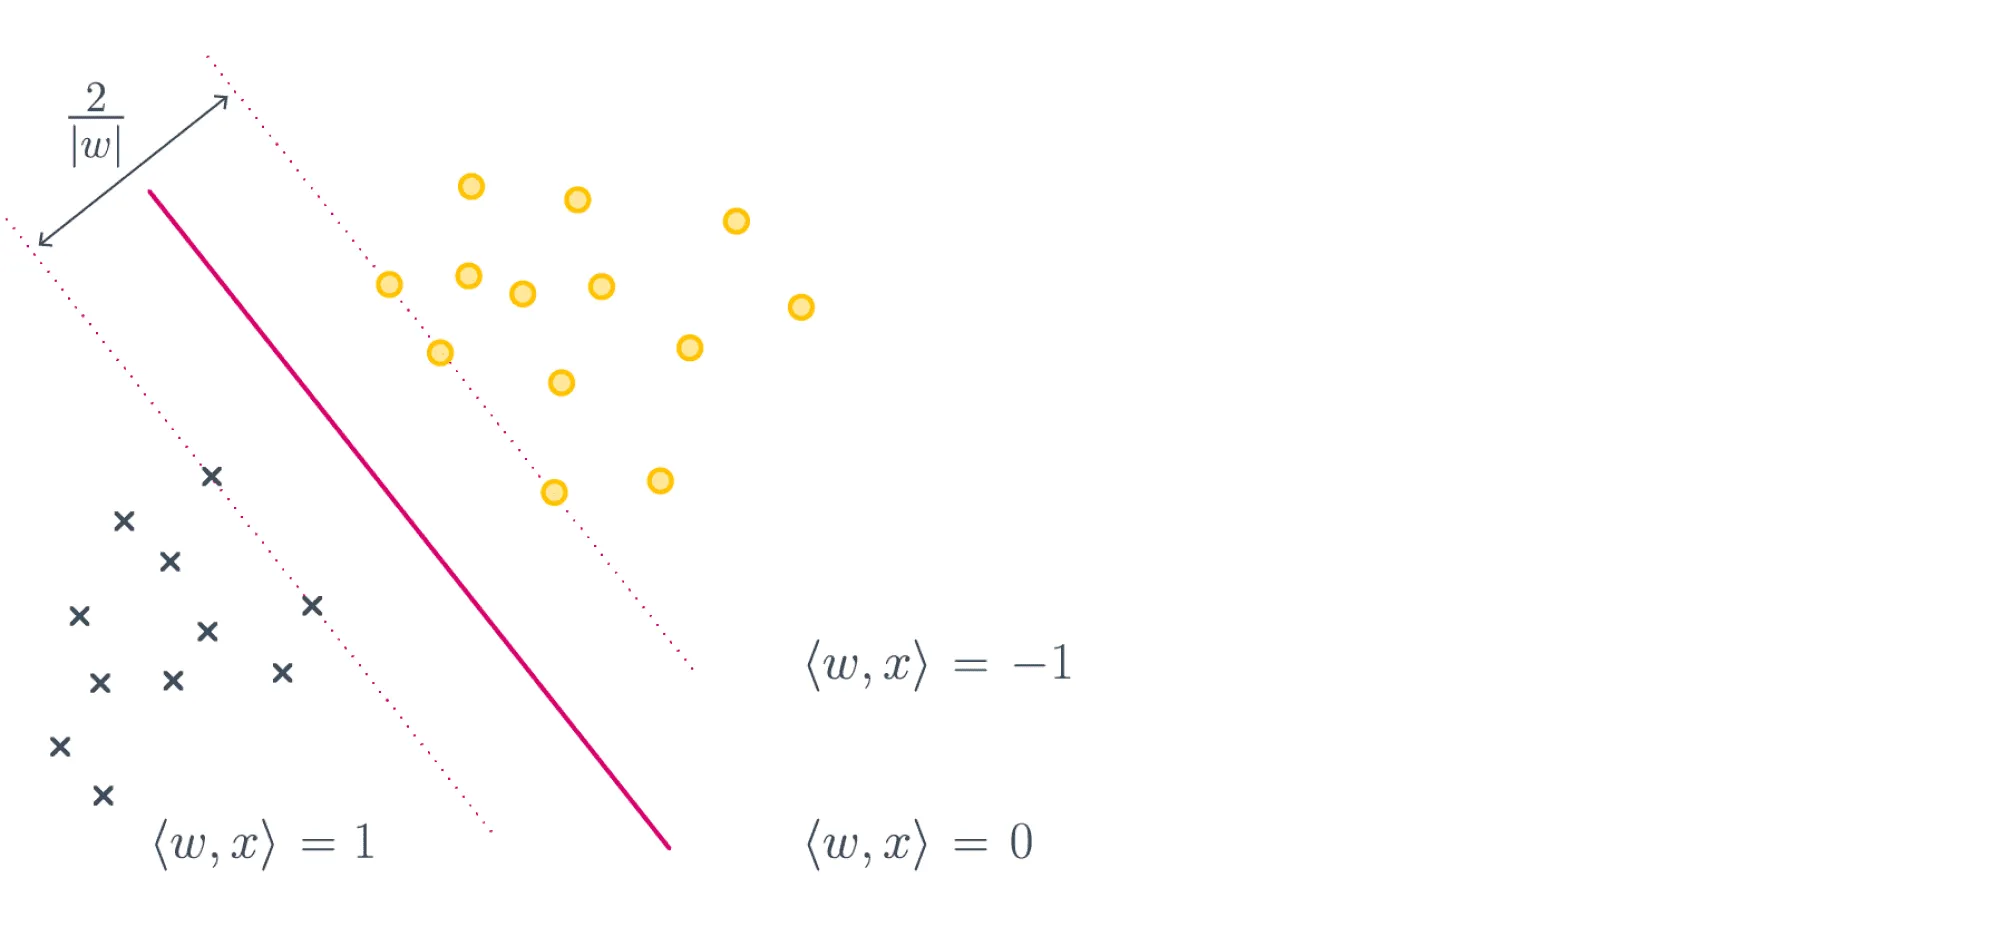


### Почему добавленная единичка приводит к желаемому результату?

Интуитивно это можно объяснить следующим образом: объекты, которые правильно классифицированы, но не "очень уверенно" (то есть $0 \leq y_i \langle w, x_i \rangle < 1$), всё равно вносят вклад в градиент. Это заставляет модель стараться отодвинуть разделяющую гиперплоскость как можно дальше от этих объектов, увеличивая уверенность в классификации.

Этот результат можно объяснить более строго. Важно понять, что наша цель — максимизировать минимальный отступ, что, в свою очередь, эквивалентно максимизации ширины полосы разделения. Для этого необходимо максимизировать выражение $2 \|w\|^2_2$, что соответствует ширине полосы при условии, что большинство объектов лежат на правильной стороне разделяющей гиперплоскости. Это ведёт к решению исходной задачи:

$$
\lambda \|w\|^2_2 + \sum_{i} \max(0, 1 - y_i \langle w, x_i \rangle) \rightarrow \min_w
$$

Отметим, что первое слагаемое в функции потерь обратно пропорционально ширине полосы, а второе слагаемое штрафует за объекты, неправильно классифицированные относительно разделяющей гиперплоскости. Важно понимать, что классы не всегда линейно разделимы, и в реальных задачах возможно наличие ошибок в классификации.

### Опорные вектора и метод опорных векторов (SVM)

В итоге, положение разделяющей гиперплоскости определяется лишь несколькими обучающими примерами. Это — ближайшие к гиперплоскости правильно классифицированные объекты, которые называют **опорными векторами** (support vectors). Весь метод, соответственно, называется **методом опорных векторов** (Support Vector Machine, SVM).

С момента своего появления в 60-е годы, SVM стал одним из самых мощных методов машинного обучения. Однако в 90-е годы его сменили методы, основанные на деревьях решений, а затем нейросети.

### Почему SVM был столь популярен?

Популярность SVM объясняется несколькими важными факторами:
1. **Небольшое количество параметров** — модель имеет сравнительно небольшое количество настраиваемых гиперпараметров.
2. **Доказуемая оптимальность** — метод имеет математически обоснованную оптимальность, что делает его привлекательным для различных задач.
3. В эпоху более медленных компьютеров и нехватки вычислительных мощностей модели с хорошими теоретическими гарантиями (такие как SVM) были востребованы, поскольку обеспечивали стабильные результаты в самых разных ситуациях.

### Преимущества и модификации SVM

SVM имеет несколько замечательных свойств:
- **Единственность решения** — в отличие от многих других алгоритмов, решение задачи классификации с помощью SVM всегда единственно и оптимально.
- **Минимальная склонность к переобучению** — среди всех популярных классов линейных классификаторов SVM имеет минимальную склонность к переобучению.

Кроме того, несложная модификация SVM, называемая **ядерным SVM** (Kernel SVM), позволяет проводить классификацию с использованием нелинейных разделяющих гиперплоскостей, что делает метод более гибким и подходящим для широкого спектра задач.

Таким образом, SVM остаётся важным инструментом в арсенале методов машинного обучения, несмотря на развитие других подходов.










# Логистическая регрессия

В этом параграфе мы будем обозначать классы как 0 и 1.

Логистическая регрессия является интересным методом, который возникает из желания рассматривать задачу классификации как задачу предсказания вероятностей. Хорошим примером применения этого подхода является предсказание кликов в интернете (например, в контексте рекламы или поиска). Наличие клика в обучающем логе не означает, что при повторении условий эксперимента пользователь обязательно кликнет снова. Скорее, у каждого объекта есть своя "кликабельность", то есть вероятность того, что пользователь кликнет по данному объекту. Клик на каждом обучающем примере представляет собой реализацию этой случайной величины. В предельном случае, для каждой точки, отношение положительных и отрицательных примеров должно сходиться к этой вероятности.

Проблема заключается в том, что вероятность, по определению, принимает значения от 0 до 1, а простой способ обучения линейной модели, который бы соблюдал это ограничение, не существует. Один из возможных путей решения — обучить линейную модель предсказывать некоторую величину, связанную с вероятностью, но с диапазоном значений, равным $(-\infty, \infty)$, а затем преобразовать эти ответы в вероятности. Такой величиной является логит (или логарифм отношения вероятности положительного события к вероятности отрицательного события):  
$$
\text{logit}(p) = \log\left(\frac{p}{1-p}\right)
$$

Если модель возвращает значение логита, то вероятности можно вычислить по следующей формуле:
$$
p = \frac{1}{1 + e^{-\langle w, x_i \rangle}}
$$
Здесь $\langle w, x_i \rangle$ — это линейная комбинация признаков, а $\sigma(z) = \frac{1}{1 + e^{-z}}$ — это сигмоида, которая преобразует любое число в интервал $[0, 1]$, что и является вероятностью.

Таким образом, вероятность $p$ равна:
$$
p = \sigma(\langle w, x_i \rangle)
$$

Теперь задача сводится к обучению модели для оптимального предсказания логитов. Для этого можно использовать метод максимизации правдоподобия для распределения Бернулли, которое описывает вероятность возникновения события, например, выпадение орла при подбрасывании монеты с вероятностью $p$. В нашей задаче событие — это клик пользователя по объекту с вероятностью $p$. Если вам интересно, подробнее про распределение Бернулли можно почитать в теоретическом минимуме.

Правдоподобие позволяет нам оценить, насколько вероятно наблюдать данные метки классов $y$ при данных признаках $X$ и весах $w$. Оно имеет вид:
$$
p(y \mid X, w) = \prod_i p(y_i \mid x_i, w)
$$
Для распределения Бернулли это можно записать так:
$$
p(y \mid X, w) = \prod_i p_i^{y_i} (1 - p_i)^{1 - y_i}
$$
где $p_i$ — это вероятность, предсказанная моделью для $i$-го примера.

Преимущество в работе с логарифмическим правдоподобием, так как оно преобразует произведение вероятностей в сумму, что удобнее для оптимизации. Логарифмическое правдоподобие будет:
$$
\ell(w, X, y) = \sum_i \left(y_i \log(p_i) + (1 - y_i) \log(1 - p_i)\right)
$$
Подставляем выражение для $p_i = \sigma(\langle w, x_i \rangle)$:
$$
\ell(w, X, y) = \sum_i \left(y_i \log(\sigma(\langle w, x_i \rangle)) + (1 - y_i) \log(1 - \sigma(\langle w, x_i \rangle))\right)
$$

Если заметить, что $\sigma(-z) = 1 - \sigma(z)$, то выражение можно упростить:
$$
\ell(w, X, y) = \sum_i \left(y_i \log(\sigma(\langle w, x_i \rangle)) + (1 - y_i) \log(\sigma(-\langle w, x_i \rangle))\right)
$$

Теперь, чтобы найти оптимальные веса $w$, максимизируем логарифмическое правдоподобие. Для этого, чтобы преобразовать задачу в минимизацию, умножаем её на минус один, получая функцию потерь:
$$
L(w, X, y) = - \sum_i \left(y_i \log(\sigma(\langle w, x_i \rangle)) + (1 - y_i) \log(\sigma(-\langle w, x_i \rangle))\right)
$$

В отличие от линейной регрессии, для логистической регрессии нет явной формулы решения. Поэтому мы используем метод градиентного спуска. Градиент функции потерь по параметрам $w$ выглядит так:
$$
\nabla_w L(w, X, y) = - \sum_i x_i (y_i - \sigma(\langle w, x_i \rangle))
$$
Этот градиент позволяет эффективно обновлять веса модели при обучении с помощью градиентного спуска.







### Предсказание модели логистической регрессии

Как мы уже договорились, модель логистической регрессии предсказывает вероятность положительного класса $p$ по следующей формуле:
$$
p = \sigma(\langle w, x_i \rangle)
$$
где $\sigma(z) = \frac{1}{1 + e^{-z}}$ — это функция сигмоиды, а $\langle w, x_i \rangle$ — линейная комбинация признаков $x_i$ с параметрами модели $w$.

Эта вероятность $p$ лежит в интервале от 0 до 1 и представляет собой степень уверенности модели в том, что объект принадлежит положительному классу. Однако, как перейти от этой вероятности к самому предсказанию класса?

В отличие от других методов, где предсказание класса можно было бы сделать на основе знака линейной комбинации (например, $\langle w, x_i \rangle > 0$ — это класс 1, а $\langle w, x_i \rangle < 0$ — это класс 0), здесь всё немного сложнее. Наши предсказания теперь лежат в пределах от 0 до 1, и нужно как-то решить, к какому из классов отнести объект.

Интуитивно и не совсем корректно можно сказать, что нужно просто взять порог 0.5: если $p > 0.5$, то объект принадлежит положительному классу (1), а если $p < 0.5$, то отрицательному (0). Однако это далеко не всегда лучший выбор. На практике более правильным подходом является подбор порога, который минимизирует ошибку на тестовой выборке, например, минимизируя какую-либо метрику, такую как точность (accuracy), F1-меру или другую, в зависимости от задачи. Более того, порог можно настроить так, чтобы доля положительных и отрицательных примеров, предсказанных моделью, как можно больше соответствовала их реальному распределению в данных.

### Логистическая регрессия и логиты

Несмотря на то что мы решаем задачу классификации, метод называется **логистической регрессией**, а не логистической классификацией. Это связано с тем, что модель на самом деле предсказывает не классы, а **вещественные числа**, которые называются **логитами**. Эти логиты соответствуют линейной комбинации признаков и параметров модели $\langle w, x_i \rangle$. Полученная из этих логитов вероятность через сигмоиду преобразуется в число в интервале от 0 до 1.

Таким образом, мы не просто предсказываем классы (0 или 1), а вычисляем вероятность принадлежности объекта к положительному классу. Из этих вероятностей и принимается решение о классе, используя какой-то порог.


### Вопрос на подумать

Проверьте, что если метки классов $y$ принимают значения $\pm 1$ (то есть $y \in \{-1, 1\}$, а не $\{0, 1\}$), то функцию потерь для логистической регрессии можно записать в более компактной форме:
$$
L(w, X, y) = \sum_{i=1}^N \log(1 + e^{-y_i \langle w, x_i \rangle})
$$
Это выражение является эквивалентом функции потерь, которую мы использовали раньше, но в более удобной и компактной форме.

### Вопрос на подумать: Разделяющая поверхность

Правда ли, что разделяющая поверхность модели логистической регрессии является гиперплоскостью? Ответ — да.

Разделяющая поверхность в контексте логистической регрессии — это гиперплоскость, которая отделяет объекты, относящиеся к положительному классу (1), от объектов, относящихся к отрицательному классу (0). Эта поверхность определяется значением вероятности, выше которого объект отнесён к положительному классу, а ниже — к отрицательному.

Как правило, если мы принимаем порог 0.5, то разделяющая поверхность будет соответствовать значению $p = 0.5$. Для модели логистической регрессии вероятность $p$ равна:
$$
p = \sigma(\langle w, x \rangle)
$$
Чтобы $p = 0.5$, необходимо, чтобы:
$$
\sigma(\langle w, x \rangle) = 0.5
$$
Сигмоида принимает значение 0.5, когда её аргумент равен нулю. Таким образом, разделяющая поверхность для модели логистической регрессии определяется уравнением:
$$
\langle w, x \rangle = 0
$$
Это уравнение гиперплоскости, где вектор весов $w$ перпендикулярен этой гиперплоскости, а признаки $x$ лежат на её поверхности. Таким образом, разделяющая поверхность логистической регрессии действительно является гиперплоскостью в пространстве признаков.



### **Вопрос: Верно ли, что задача восстановления логистической регрессии имеет единственное решение, если матрица объектов-признаков $X$ обладает полным рангом по столбцам (то есть её столбцы линейно независимы)?**



### **Ответ**

Логистическая регрессия является одним из базовых методов классификации в машинном обучении. В основе её математической модели лежит минимизация выпуклой функции потерь:

$$
L(w, X, y) = \sum_{i=1}^N \log\left(1 + e^{-y_i \langle w, x_i \rangle}\right),
$$

где:
- $w \in \mathbb{R}^d$ — вектор параметров модели,
- $X \in \mathbb{R}^{N \times d}$ — матрица объектов-признаков,
- $y \in \{-1, 1\}^N$ — вектор меток классов,
- $\langle w, x_i \rangle$ — скалярное произведение параметров $w$ и вектора признаков $x_i$.

Задача состоит в определении условий, при которых функция $L(w, X, y)$ имеет единственный минимум. Мы проведём математический анализ, опираясь на выпуклость функции и свойства её второго градиента (матрицы Гессе).



### **Обоснование**

#### 1. Выпуклость функции потерь

Для проверки выпуклости $L(w, X, y)$ необходимо доказать, что матрица вторых производных (Гессе) $\nabla^2 L(w, X, y)$ является положительно определённой. Рассмотрим процесс вычисления первых и вторых производных.

##### 1.1. Градиент функции потерь

Функция потерь имеет вид:

$$
L(w, X, y) = \sum_{i=1}^N \log\left(1 + e^{-y_i \langle w, x_i \rangle}\right).
$$

Первая производная по $w_j$ записывается как:

$$
\frac{\partial L(w, X, y)}{\partial w_j} = \sum_{i=1}^N \frac{-y_i x_{ij} e^{-y_i \langle w, x_i \rangle}}{1 + e^{-y_i \langle w, x_i \rangle}}.
$$

Обозначим сигмоидальную функцию $\sigma(z) = \frac{1}{1 + e^{-z}}$. Тогда производная принимает вид:

$$
\frac{\partial L(w, X, y)}{\partial w_j} = \sum_{i=1}^N y_i x_{ij} \left(1 - \sigma(y_i \langle w, x_i \rangle)\right).
$$

##### 1.2. Матрица вторых производных (Гессе)

Вторая производная по $w_j$ и $w_k$:

$$
\frac{\partial^2 L(w, X, y)}{\partial w_j \partial w_k} = \sum_{i=1}^N \frac{\partial}{\partial w_k} \left(y_i x_{ij} \left(1 - \sigma(y_i \langle w, x_i \rangle)\right)\right).
$$

Используя производную сигмоидальной функции:

$$
\frac{\partial \sigma(z)}{\partial z} = \sigma(z)(1 - \sigma(z)),
$$

получаем:

$$
\frac{\partial^2 L(w, X, y)}{\partial w_j \partial w_k} = \sum_{i=1}^N x_{ij} x_{ik} \sigma(y_i \langle w, x_i \rangle)(1 - \sigma(y_i \langle w, x_i \rangle)).
$$

Обозначим диагональную матрицу $D$, где элементы на диагонали равны:

$$
D_{ii} = \sigma(y_i \langle w, x_i \rangle)(1 - \sigma(y_i \langle w, x_i \rangle)).
$$

Тогда матрицу Гессе можно представить в виде:

$$
\nabla^2 L(w, X, y) = X^T D X.
$$

#### 2. Свойства матрицы Гессе

Матрица $D$ положительно определённая, поскольку $0 < \sigma(z)(1 - \sigma(z)) < 1$ для любого $z$. Если матрица $X$ имеет полный ранг по столбцам, то произведение $X^T D X$ также положительно определённо. Это означает, что для любого ненулевого вектора $u$:

$$
u^T \nabla^2 L(w, X, y) u = u^T X^T D X u = \|D^{1/2} X u\|^2 > 0.
$$

Таким образом, функция $L(w, X, y)$ является выпуклой.

#### 3. Условие существования минимума

Хотя выпуклость функции гарантирует единственность минимума, сам факт существования этого минимума требует дополнительных условий. Рассмотрим два случая:

1. **Линейно разделимая выборка**: Если существует такой вектор $w$, что для всех $i$:

$$
y_i \langle w, x_i \rangle > 0,
$$

то функция $L(w, X, y)$ неограниченно уменьшается, поскольку логарифм приближается к нулю по мере роста $y_i \langle w, x_i \rangle$. В этом случае минимум функции не существует.

2. **Линейно неразделимая выборка**: Если выборка неразделима линейно, то значение $L(w, X, y)$ ограничено снизу, и выпуклая функция имеет единственный минимум.



### **Вывод**

1. **Если выборка линейно неразделима** и матрица $X$ обладает полным рангом по столбцам, то задача восстановления логистической регрессии имеет единственное решение. Это следует из выпуклости функции потерь и положительной определённости матрицы Гессе.
2. **Если выборка линейно разделима**, функция потерь не ограничена снизу, и решение отсутствует. Это связано с тем, что в этом случае параметры $w$ могут принимать бесконечно большие значения, продолжая уменьшать значение функции потерь.



Таким образом, утверждение о единственности решения задачи логистической регрессии верно лишь при выполнении условия линейной неразделимости выборки. В противном случае решение отсутствует из-за неограниченности функции потерь.

### **Вопрос на размышление**

На изображении представлены результаты работы трёх моделей логистической регрессии на одном и том же датасете с различными коэффициентами $L_2$-регуляризации.  

На верхнем ряду показаны предсказанные вероятности положительного класса, а на нижнем — разделяющая поверхность.  
Как вы думаете, какая из картинок соответствует наибольшему коэффициенту регуляризации, а какая — наименьшему? Обоснуйте свой ответ.  



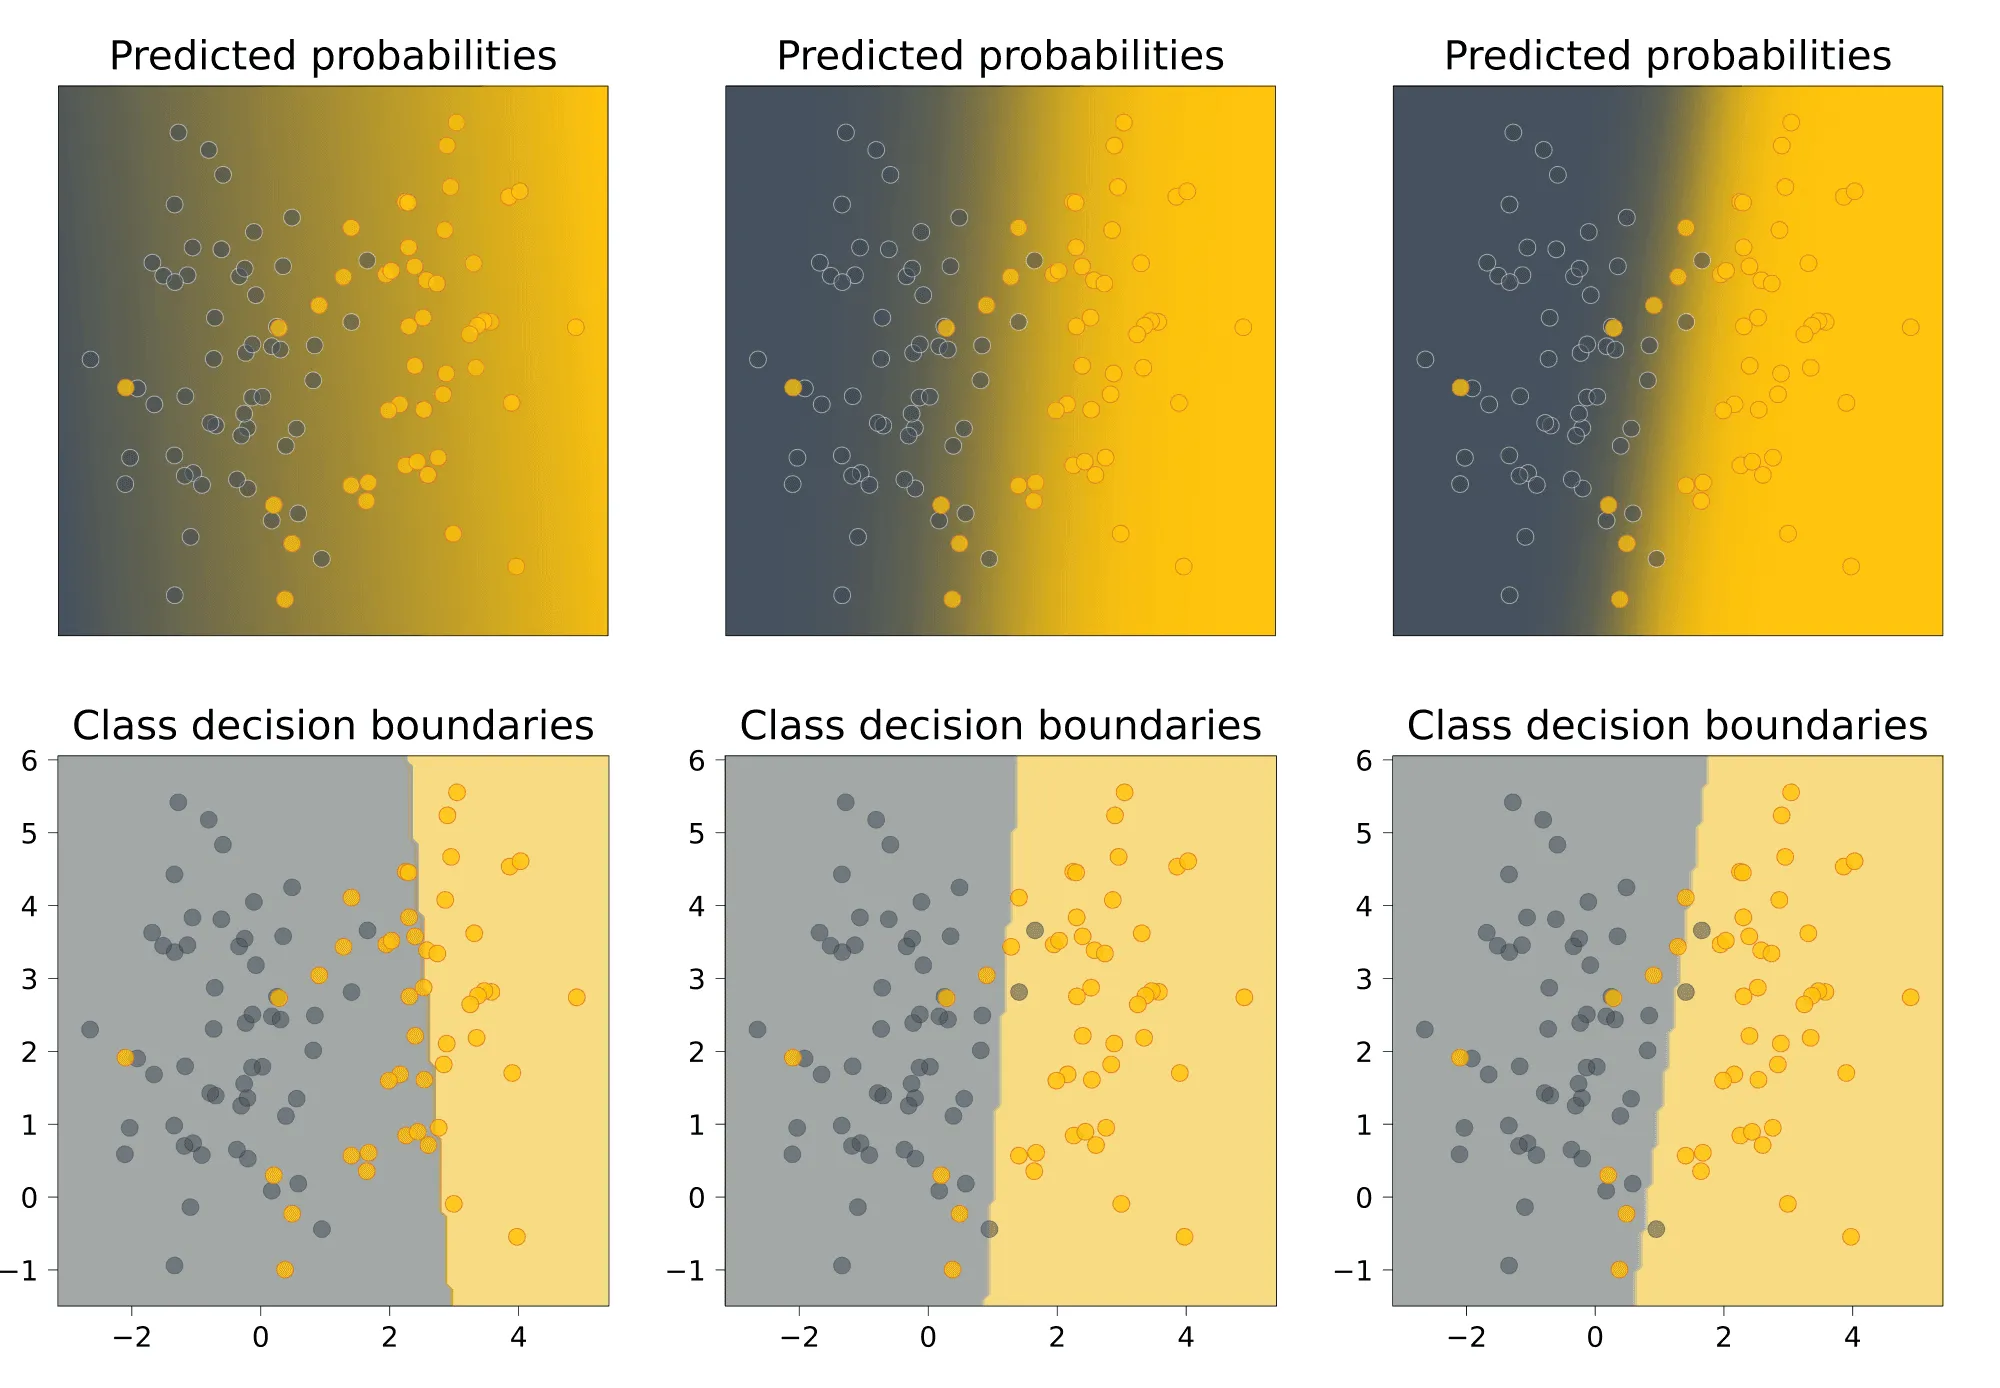


### **Ответ**

#### 1. Модель с **самым большим коэффициентом регуляризации**  
Наибольший коэффициент $L_2$-регуляризации, скорее всего, соответствует **левой модели**. Это можно обосновать следующими наблюдениями:  

- **Разделяющая поверхность выглядит необычно и слабо соответствует данным.**  
  Это свидетельствует о том, что регуляризационный член в функции потерь (штраф за величину весов $w$) оказывает значительное влияние, подавляя точную подстройку модели под данные.  

- **Предсказанные вероятности положительного класса близки к 0.5.**  
  На верхнем графике цвета слабо выражены, что указывает на то, что значения $\langle w, x \rangle$ малы по модулю. Это связано с тем, что вектор весов $w$ стал близким к нулю под действием сильной регуляризации.  

Таким образом, чрезмерная регуляризация приводит к тому, что модель становится "плоской" и менее чувствительной к входным данным.  



#### 2. Модель с **самым маленьким коэффициентом регуляризации**  
Наименьший коэффициент регуляризации соответствует **правой модели**, о чём свидетельствуют следующие факты:  

- **Уверенные предсказания вероятностей.**  
  На верхнем графике цвета насыщенные, что указывает на высокую уверенность модели в своих предсказаниях. Это свидетельствует о том, что значения $\langle w, x \rangle$ велики по модулю.  

- **Разделяющая поверхность хорошо подстроена к данным.**  
  При слабой регуляризации штраф за величину весов $w$ минимален, и модель может лучше адаптироваться к особенностям выборки.  

Таким образом, слабо регуляризованная модель способна обучаться "более смело", лучше подстраиваясь под данные, но с риском переобучения.  



#### 3. Модель с **средним коэффициентом регуляризации**  
Средний коэффициент регуляризации соответствует **центральной модели**.  

- **Предсказанные вероятности умеренно выражены.**  
  Цвета на верхнем графике менее насыщенные, чем у правой модели, но всё же не столь блеклые, как у левой. Это говорит о том, что значения $\langle w, x \rangle$ находятся в промежуточной области.  

- **Разделяющая поверхность сглажена, но всё ещё адекватно соответствует данным.**  
  Регуляризация не подавляет веса $w$ настолько сильно, чтобы модель стала неинформативной, но и не позволяет слишком свободно адаптироваться к выборке.  



Таким образом:

- **Левая модель** — самый большой коэффициент регуляризации: подавление параметров приводит к слабой чувствительности модели.  
- **Правая модель** — самый маленький коэффициент регуляризации: модель свободно подстраивается под данные, предсказывая с высокой уверенностью.  
- **Центральная модель** — компромисс между переобучением и чрезмерной регуляризацией.  

Эти различия подчёркивают баланс, который регуляризация помогает найти между простотой модели и её адаптивностью.



### Вывод формулы градиента для логистической регрессии

Для того чтобы обучить модель логистической регрессии, необходимо минимизировать функцию потерь, используя градиентный спуск. Для этого мы должны найти градиент функции потерь $L(w, X, y)$ по параметрам модели $w$. Для этого нам нужно использовать несколько математических свойств, в том числе производные логистической функции (сигмоиды).

#### Сигмоида и её производная

Сигмоида — это функция, которая преобразует любое вещественное число в диапазон от 0 до 1. Она определяется как:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Нам нужно вычислить её производную, так как она используется в градиенте функции потерь.

Производная логистической функции $\sigma(z)$ по переменной $z$ (где $z$ — это линейная комбинация признаков) вычисляется следующим образом. Для начала выразим логарифм сигмоиды:
$$
\log \sigma(z) = \log \left( \frac{1}{1 + e^{-z}} \right) = - \log(1 + e^{-z})
$$

Теперь найдём производную:
$$
\frac{d}{dz} \log \sigma(z) = \frac{d}{dz} \left( - \log(1 + e^{-z}) \right)
$$
Используя правило дифференцирования для логарифма, получаем:
$$
\frac{d}{dz} \log \sigma(z) = -\frac{1}{1 + e^{-z}} \cdot \frac{d}{dz} (1 + e^{-z}) = -\frac{-e^{-z}}{1 + e^{-z}} = \frac{e^{-z}}{1 + e^{-z}}
$$
Это выражение можно переписать как:
$$
\frac{d}{dz} \log \sigma(z) = \sigma(z) (1 - \sigma(z))
$$

Теперь аналогично найдём производную для $\log \sigma(-z)$:
$$
\log \sigma(-z) = - \log(1 + e^{z})
$$
Производная будет:
$$
\frac{d}{dz} \log \sigma(-z) = -\frac{e^{z}}{1 + e^{z}} = - \sigma(z)
$$

#### Градиент функции потерь

Функция потерь для логистической регрессии — это логарифмическое правдоподобие, которое мы записали ранее:
$$
L(w, X, y) = - \sum_i \left( y_i \log(\sigma(\langle w, x_i \rangle)) + (1 - y_i) \log(1 - \sigma(\langle w, x_i \rangle)) \right)
$$

Для нахождения градиента этой функции по параметрам $w$, необходимо вычислить производные функции потерь по каждому из весов $w_j$. Для этого воспользуемся цепным правилом, учитывая, что аргумент сигмоиды — это линейная комбинация признаков $x_i$ и весов $w$, то есть $\langle w, x_i \rangle = w_1 x_{i1} + w_2 x_{i2} + \dots + w_n x_{in}$.

Для первого члена функции потерь, производная будет:
$$
\frac{\partial}{\partial w_j} \left( y_i \log(\sigma(\langle w, x_i \rangle)) \right) = y_i \cdot \frac{1}{\sigma(\langle w, x_i \rangle)} \cdot \frac{\partial}{\partial w_j} \sigma(\langle w, x_i \rangle)
$$
Используем производную сигмоиды:
$$
\frac{\partial}{\partial w_j} \sigma(\langle w, x_i \rangle) = \sigma(\langle w, x_i \rangle) (1 - \sigma(\langle w, x_i \rangle)) \cdot x_{ij}
$$

Аналогично для второго члена, производная будет:
$$
\frac{\partial}{\partial w_j} \left( (1 - y_i) \log(1 - \sigma(\langle w, x_i \rangle)) \right) = - (1 - y_i) \cdot \frac{1}{1 - \sigma(\langle w, x_i \rangle)} \cdot \frac{\partial}{\partial w_j} \sigma(\langle w, x_i \rangle)
$$

Объединяя обе части, мы получаем полный градиент:
$$
\frac{\partial L(w, X, y)}{\partial w_j} = - \sum_i \left[ y_i x_{ij} \sigma(\langle w, x_i \rangle) - (1 - y_i) x_{ij} (1 - \sigma(\langle w, x_i \rangle)) \right]
$$

Градиент функции потерь для всех весов $w$ будет:
$$
\nabla_w L(w, X, y) = - \sum_i \left( y_i x_i \sigma(\langle w, x_i \rangle) - (1 - y_i) x_i (1 - \sigma(\langle w, x_i \rangle)) \right)
$$

После упрощения, выражение для градиента можно записать так:
$$
\nabla_w L(w, X, y) = - \sum_i x_i \left( y_i - \sigma(\langle w, x_i \rangle) \right)
$$

Таким образом, этот градиент используется для обновления весов модели в процессе обучения. Для минимизации функции потерь мы используем метод градиентного спуска, который позволяет нам постепенно улучшать параметры $w$, чтобы модель лучше предсказывала вероятности для новых примеров.






### **Многоклассовая классификация**  

Пусть каждый объект из обучающей выборки принадлежит к одному из $K$ классов, то есть множество меток классов задаётся как $Y = \{1, \dots, K\}$. Для того чтобы предсказывать эти классы с помощью линейных моделей, задачу многоклассовой классификации часто сводят к набору бинарных задач. Это удобно, так как алгоритмы для решения бинарной классификации уже хорошо изучены и эффективно реализованы.  

Рассмотрим два наиболее популярных подхода к решению многоклассовой классификации:  

1. **Метод "один против всех" (One-vs-All, OvA)**  
2. **Метод "каждый против каждого" (All-vs-All, OvO)**  

Для лучшего понимания этих методов рассмотрим их работу на небольшом игрушечном датасете.


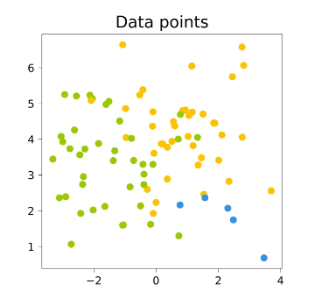








### **Один против всех (One-vs-All)**  

Метод "один против всех" заключается в обучении $K$ линейных классификаторов $b_1(x), \dots, b_K(x)$, каждый из которых оценивает принадлежность объекта одному из $K$ классов. В случае линейных моделей классификаторы имеют следующий вид:  

$$
b_k(x) = \text{sgn}(\langle w_k, x \rangle + w_{0k}),
$$  

где:  
- $w_k$ и $w_{0k}$ — параметры $k$-го классификатора;  
- $\langle w_k, x \rangle$ — скалярное произведение вектора весов и признаков объекта $x$;  
- $\text{sgn}$ — знак функции, определяющий принадлежность объекта положительному или отрицательному классу.  

### **Обучение классификаторов**  

Классификатор с номером $k$ обучается на выборке вида $(x_i, 2I[y_i = k] - 1)_{i=1}^N$, где:  
- $y_i$ — истинная метка класса для объекта $x_i$;  
- $I[y_i = k]$ — индикатор принадлежности объекта $k$-му классу, равный 1, если $y_i = k$, и 0 иначе.  

Иными словами, каждый классификатор учится отличать $k$-й класс от всех остальных, преобразуя задачу многоклассовой классификации в набор бинарных.



### **Итоговое предсказание**  

После обучения $K$ классификаторов финальный предсказатель выбирает класс, которому соответствует самый "уверенный" из них. Уверенность можно измерить через значения линейных функций:  

$$
a(x) = \arg\max_k (\langle w_k, x \rangle + w_{0k}),
$$  

где для каждого объекта выбирается класс с максимальным значением линейной функции.  



### **Пример применения**  

Рассмотрим игрушечный датасет, на котором обучены три линейных классификатора, каждый из которых отличает свой класс от остальных.  




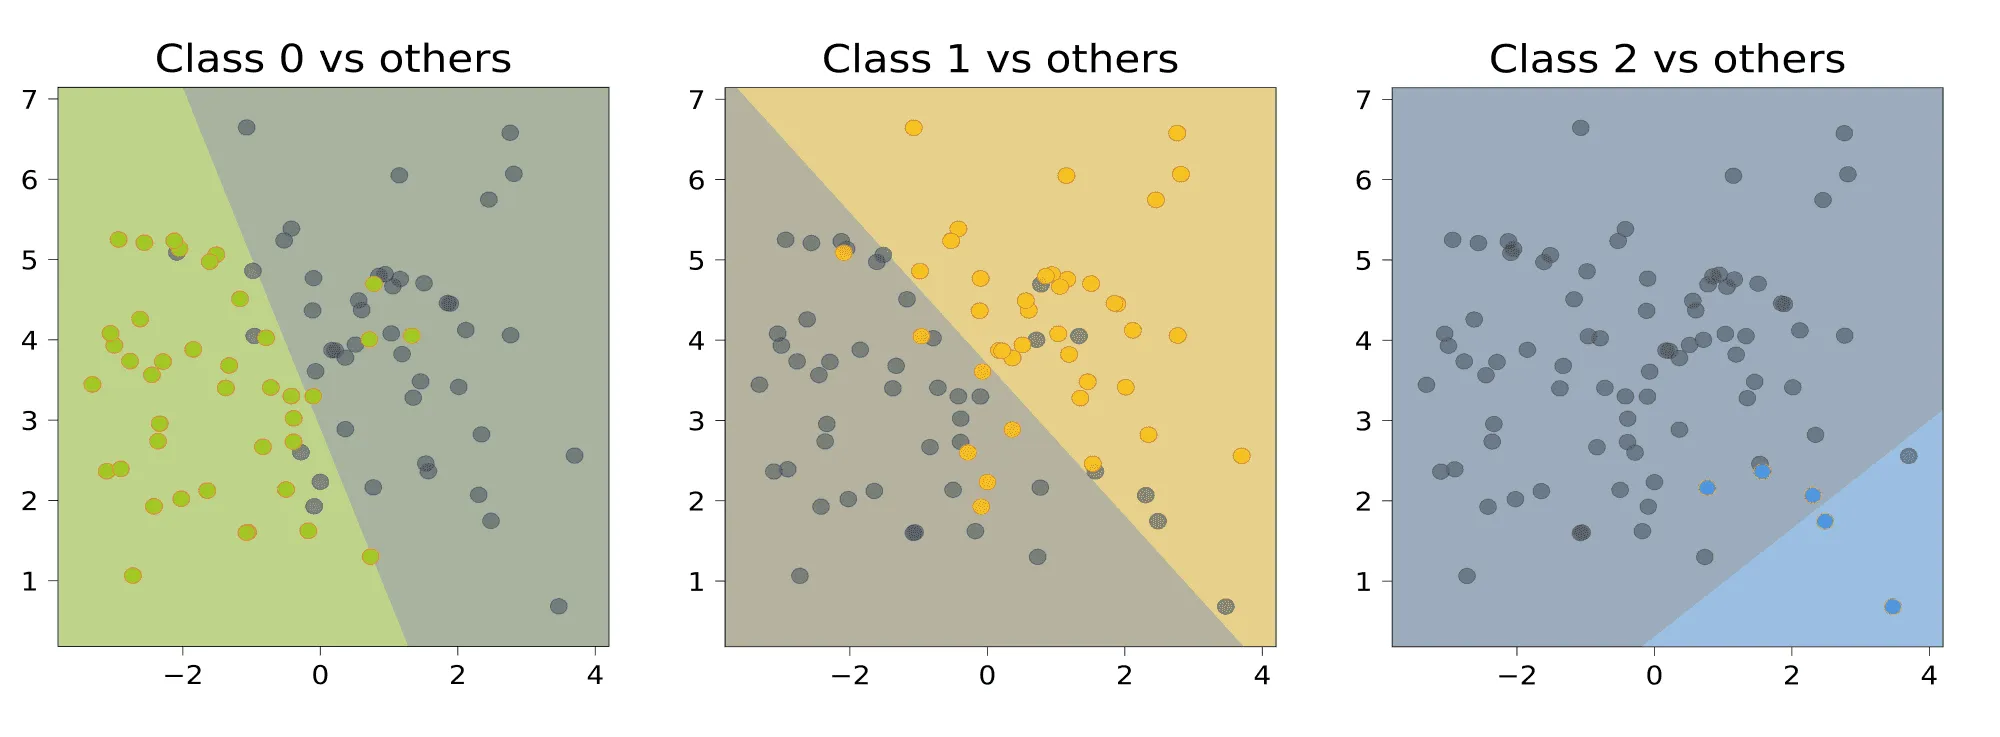

1. Сравним значения линейных функций для каждой точки выборки.  


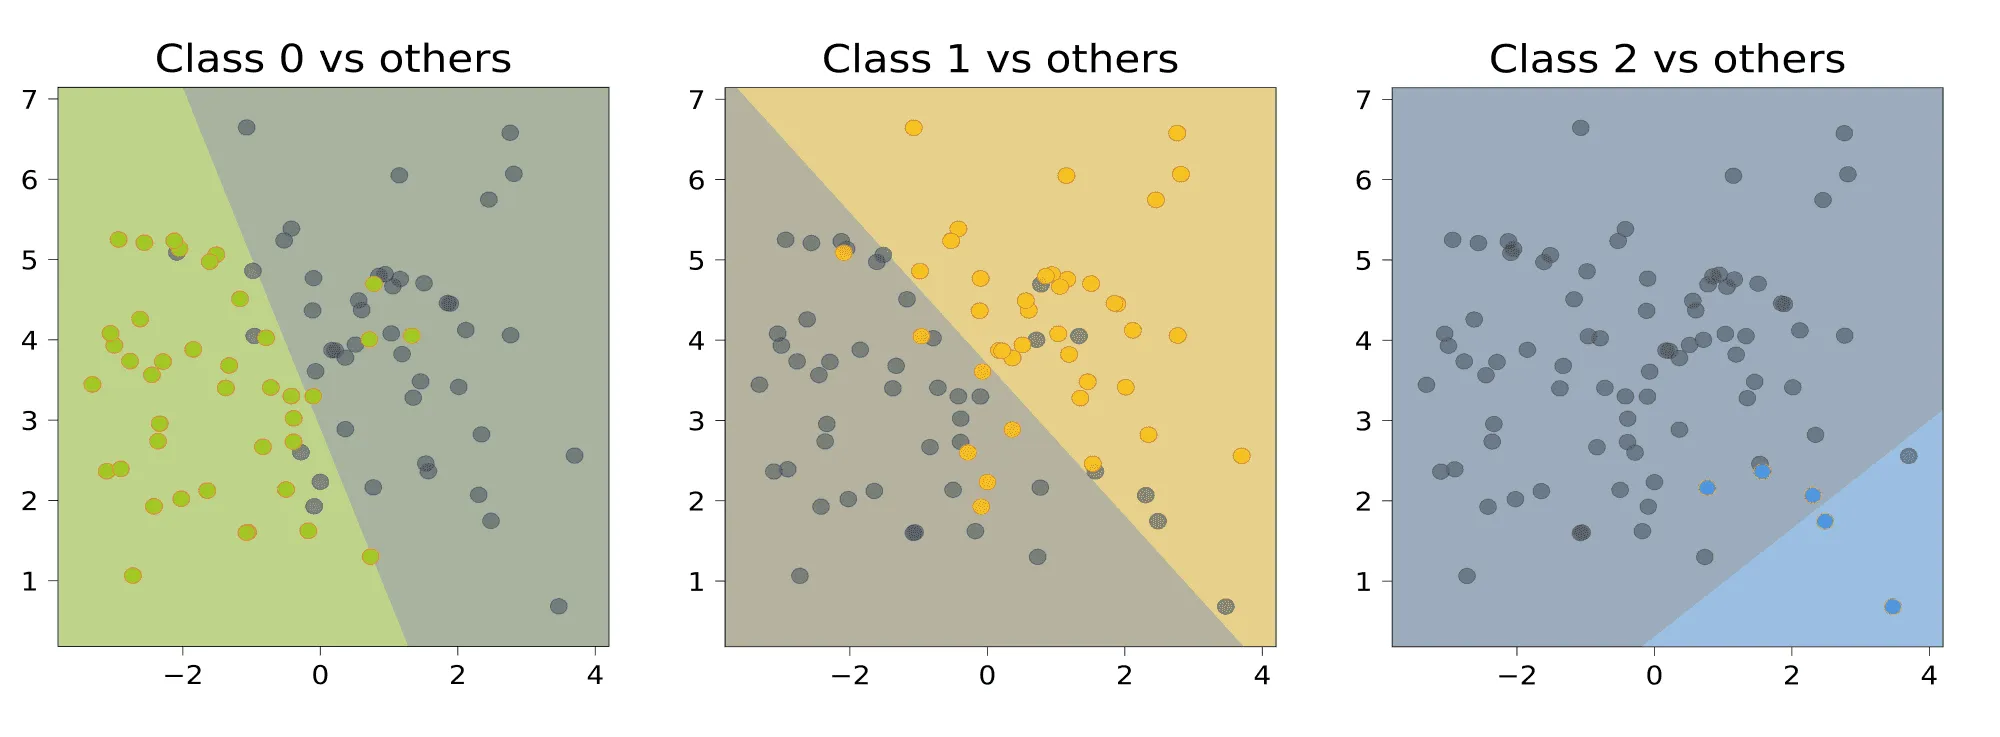

2. Для каждого объекта выберем класс, которому соответствует максимальное значение линейной функции.  


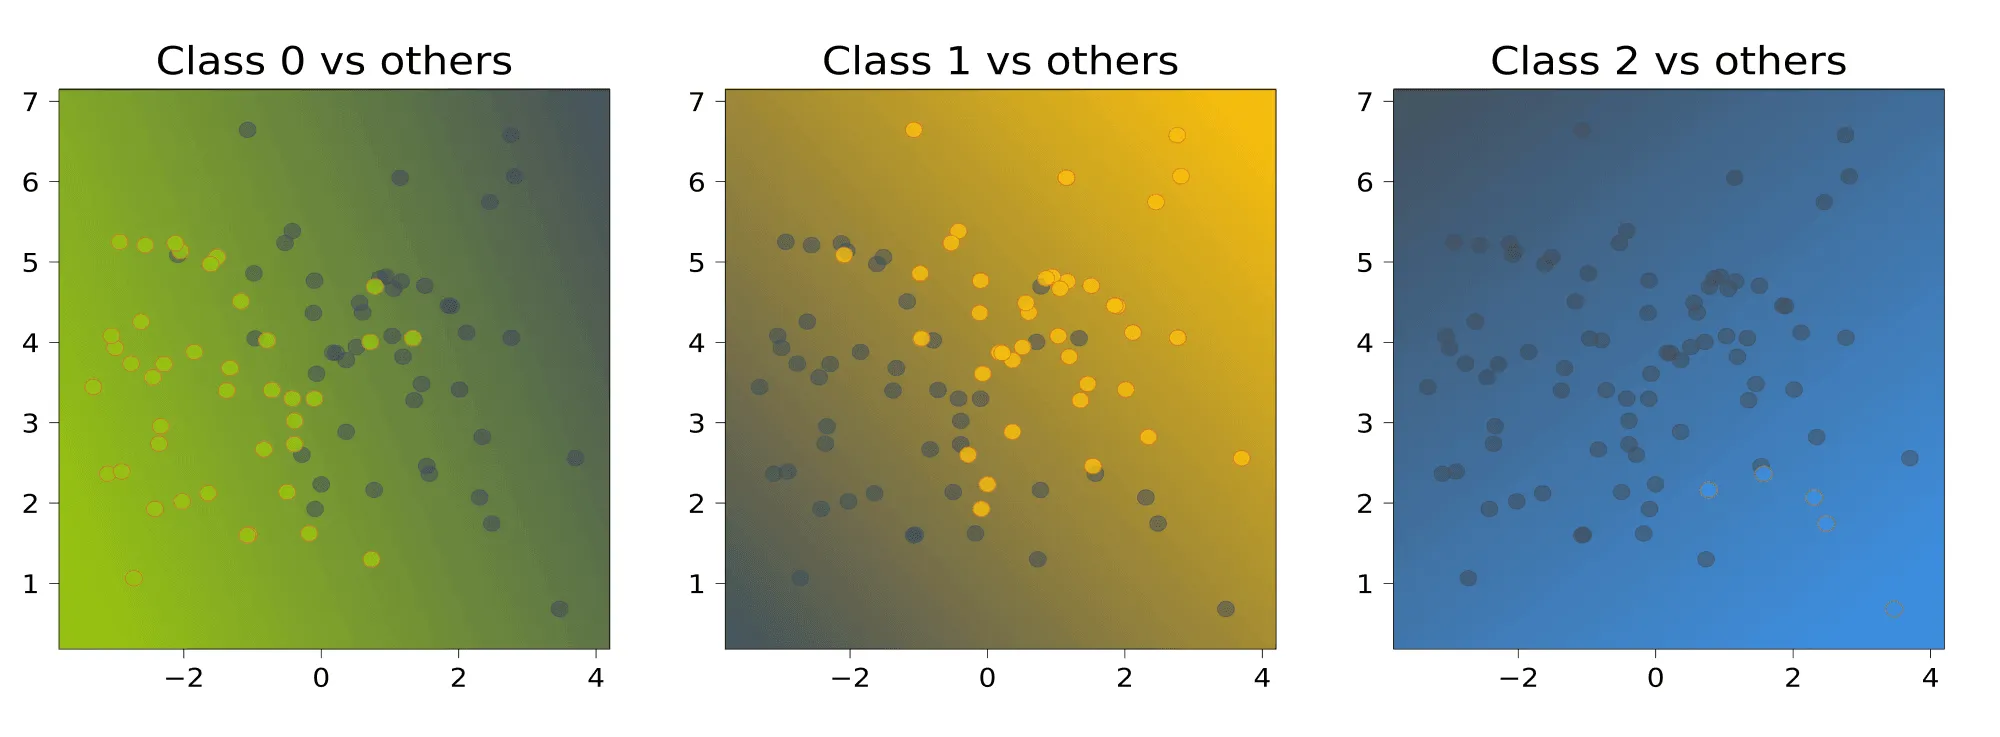

3. Обратим внимание, что классы с меньшим количеством объектов могут оказаться "обиженными", поскольку уверенность классификаторов может быть несбалансированной.

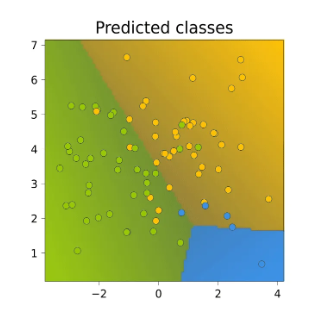


### **Итоговое предсказание**  

После обучения $K$ классификаторов финальный предсказатель выбирает класс, которому соответствует самый "уверенный" из них. Уверенность можно измерить через значения линейных функций:  

$$
a(x) = \arg\max_k (\langle w_k, x \rangle + w_{0k}),
$$  

где для каждого объекта выбирается класс с максимальным значением линейной функции.  



### **Пример применения**  

Рассмотрим игрушечный датасет, на котором обучены три линейных классификатора, каждый из которых отличает свой класс от остальных.  

1. Сравним значения линейных функций для каждой точки выборки.  
2. Для каждого объекта выберем класс, которому соответствует максимальное значение линейной функции.  
3. Обратим внимание, что классы с меньшим количеством объектов могут оказаться "обиженными", поскольку уверенность классификаторов может быть несбалансированной.




### **Проблемы метода "один против всех"**  

Основной недостаток подхода заключается в том, что каждый классификатор $b_1(x), \dots, b_K(x)$ обучается на своей собственной выборке. Это приводит к следующему:  

1. **Разные масштабы значений линейных функций:**  
   Поскольку данные для каждого классификатора отличаются, значения линейных функций $\langle w_k, x \rangle + w_{0k}$ могут иметь различные масштабы. Это затрудняет корректное сравнение "уверенностей" классификаторов.  

2. **Попытка нормировки весов:**  
   Нормировка весов, чтобы привести "уверенности" к одной шкале, не всегда оказывается разумной. Например, в случае с SVM нормировка изменяет норму весов $w_k$, что нарушает оптимальное решение задачи классификации.  

3. **Небалансированность классов:**  
   Меньшие по численности классы могут быть недостаточно хорошо представлены, что приводит к ухудшению их распознавания.  



Метод "один против всех" прост в реализации и подходит для большинства задач, однако в сложных случаях его ограниченность может стать серьёзным препятствием для достижения высокой точности классификации.


### Числовой пример и реализация на Python: "Один против всех"

#### **Постановка задачи**  
У нас есть три класса: $\{1, 2, 3\}$, и мы хотим обучить классификатор "один против всех" для игрушечного датасета из 2D-точек.  

- Цель: Построить линейные классификаторы для каждого класса и определить класс объектов на основе их "уверенности".  



#### **Игрушечный пример данных**

| $x_1$ | $x_2$ | Класс |
|||-|
| 1.0     | 2.0     | 1     |
| 2.0     | 1.0     | 1     |
| 4.0     | 4.0     | 2     |
| 5.0     | 5.0     | 2     |
| 9.0     | 9.0     | 3     |
| 10.0    | 10.0    | 3     |



#### **Реализация на Python**


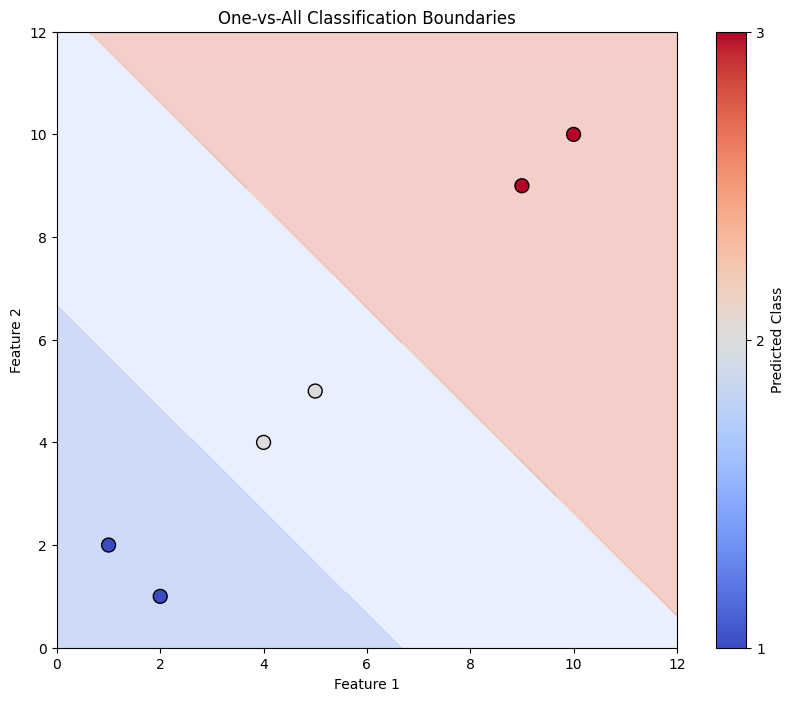

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Игрушечный датасет
X = np.array([
    [1.0, 2.0], [2.0, 1.0],  # Класс 1
    [4.0, 4.0], [5.0, 5.0],  # Класс 2
    [9.0, 9.0], [10.0, 10.0]  # Класс 3
])
y = np.array([1, 1, 2, 2, 3, 3])

# Обучение классификаторов "один против всех"
classifiers = {}
classes = np.unique(y)

for c in classes:
    # Создаем бинарные метки: текущий класс против остальных
    y_binary = (y == c).astype(int)
    clf = LogisticRegression()
    clf.fit(X, y_binary)
    classifiers[c] = clf

# Визуализация разделяющих поверхностей
x_min, x_max = 0, 12
y_min, y_max = 0, 12
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Считаем уверенности каждого классификатора
confidence = {}
for c, clf in classifiers.items():
    confidence[c] = clf.decision_function(grid)

# Определяем финальные предсказания
confidence_matrix = np.array([confidence[c] for c in classes]).T
final_predictions = classes[np.argmax(confidence_matrix, axis=1)].reshape(xx.shape)

# Визуализируем
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, final_predictions, alpha=0.3, levels=len(classes), cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=100)
plt.title("One-vs-All Classification Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(ticks=classes, label="Predicted Class")
plt.show()

### **Все против всех (All-Versus-All)**

#### **Общая идея**  
Метод "все против всех" используется для многоклассовой классификации. Мы строим классификаторы для каждой пары классов, чтобы определить, к какому из двух заданных классов относится объект. Затем используем эти классификаторы, чтобы "проголосовать" за итоговый класс для нового объекта.



### **Как это работает?**

1. **Обучение классификаторов:**  
   Для $K$ классов мы обучаем $C_K^2 = \frac{K(K-1)}{2}$ классификаторов $b_{ij}(x)$, где $i, j = 1, \dots, K$, $i \neq j$.  
   Например, для трёх классов ($K = 3$) нам нужно обучить 3 классификатора:  
   - $b_{12}(x)$: различает класс 1 и класс 2.  
   - $b_{13}(x)$: различает класс 1 и класс 3.  
   - $b_{23}(x)$: различает класс 2 и класс 3.  

   Каждый классификатор $b_{ij}(x)$ обучается на подвыборке $X_{ij} \subset X$, содержащей только объекты классов $i$ и $j$.

   Модель линейного классификатора будет иметь вид:
   $$
   b_{ij}(x) = \text{sgn}(\langle w_{ij}, x \rangle + w_{0,ij}),
   $$
   где $b_{ij}(x)$ возвращает $i$, если объект относится к классу $i$, или $j$, если объект относится к классу $j$.


Классификатор $a_{ij}(x)$ будем настраивать на подвыборке $X_{ij} \subset X$, содержащей только объекты классов $i$ и $j$. Таким образом, классификатор $a_{ij}(x)$ будет предсказывать для любого объекта либо класс $i$, либо класс $j$. Проиллюстрируем это на примере нашей выборки:

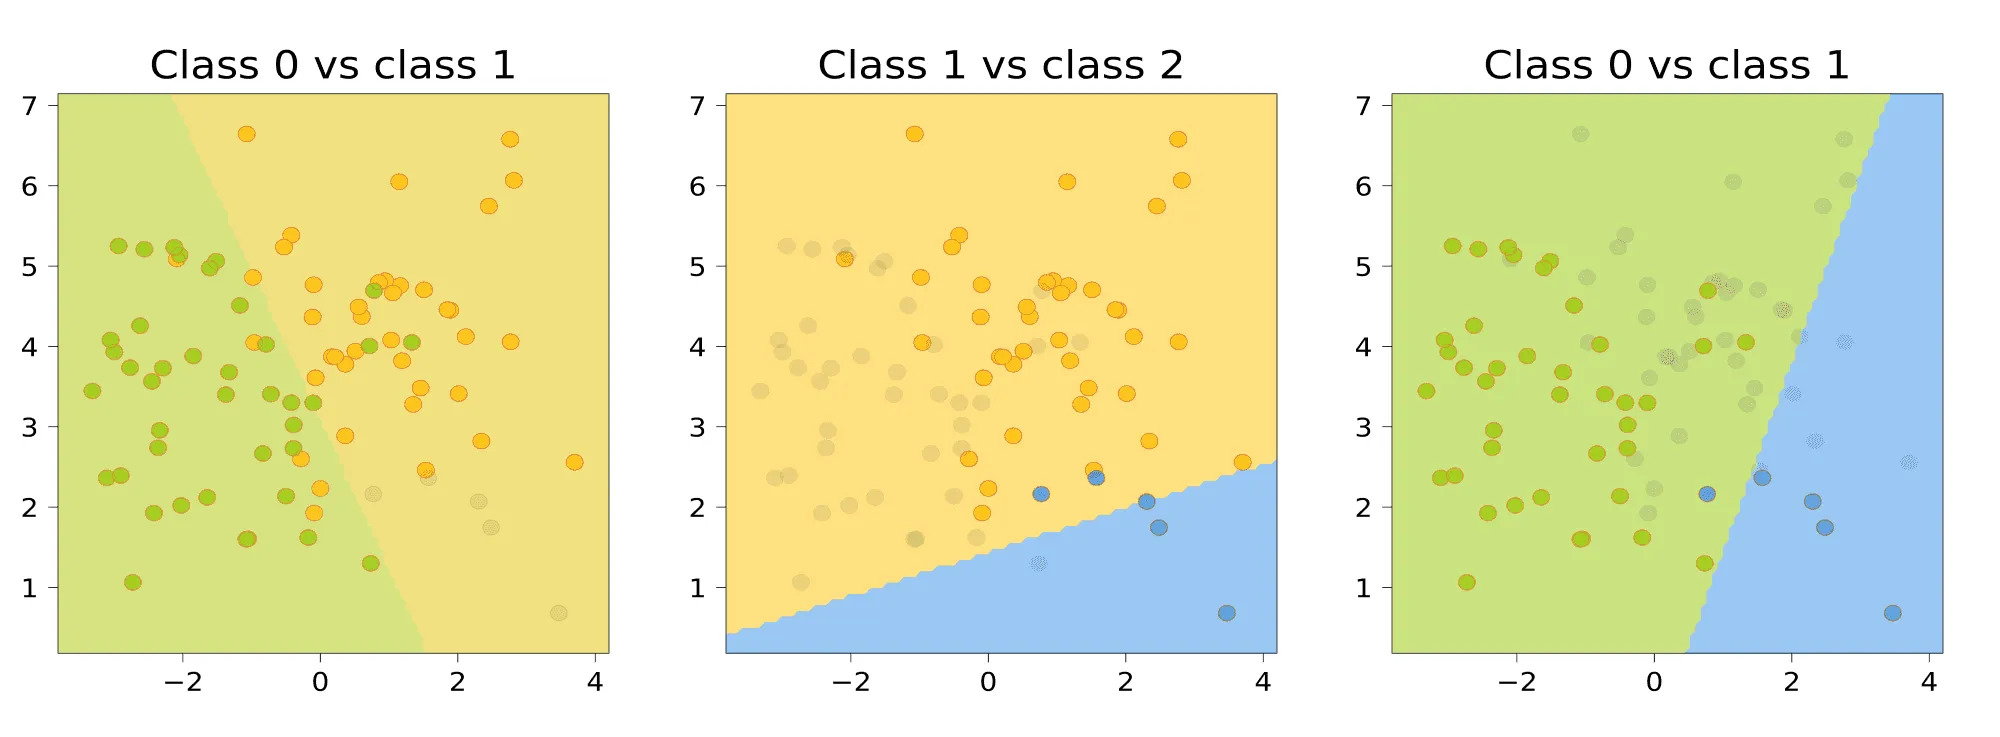


2. **Классификация нового объекта:**  
   - Каждый классификатор $b_{ij}(x)$ выдает голос в пользу одного из двух классов $i$ или $j$.  
   - Для определения итогового класса нового объекта, подсчитаем количество голосов за каждый класс:
     $$
     a(x) = \arg\max_k \sum_{i=1}^K \sum_{j \neq i} \mathbb{I}[b_{ij}(x) = k],
     $$
     где $\mathbb{I}[\cdot]$ — индикатор, равный 1, если $b_{ij}(x) = k$, иначе 0.

Для нашего датасета получается следующая картинка:

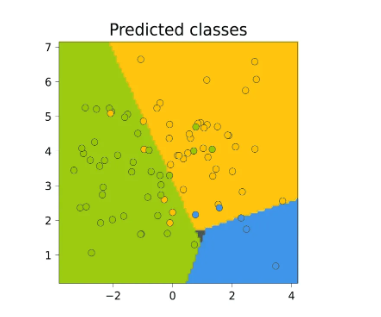

Обратите внимание на серый треугольник на стыке областей. Это точки, для которых голоса разделились (в данном случае каждый классификатор выдал какой-то свой класс, то есть у каждого класса было по одному голосу). Для этих точек нет явного способа выдать обоснованное предсказание.



### **Проблемы метода**

1. **Конфликтные зоны:**  
   В точках, где голоса за разные классы равны (например, у каждого класса по одному голосу), метод не может принять однозначное решение. Это приводит к серым "треугольным" областям на стыке классов.

2. **Количество классификаторов:**  
   Число классификаторов растет квадратично с увеличением числа классов, что может быть вычислительно затратным для большого $K$.



### **Пример на Python**

#### **Игрушечные данные**

| $x_1$ | $x_2$ | Класс |
|||-|
| 1.0     | 2.0     | 1     |
| 2.0     | 1.0     | 1     |
| 4.0     | 4.0     | 2     |
| 5.0     | 5.0     | 2     |
| 9.0     | 9.0     | 3     |
| 10.0    | 10.0    | 3     |



#### **Реализация**



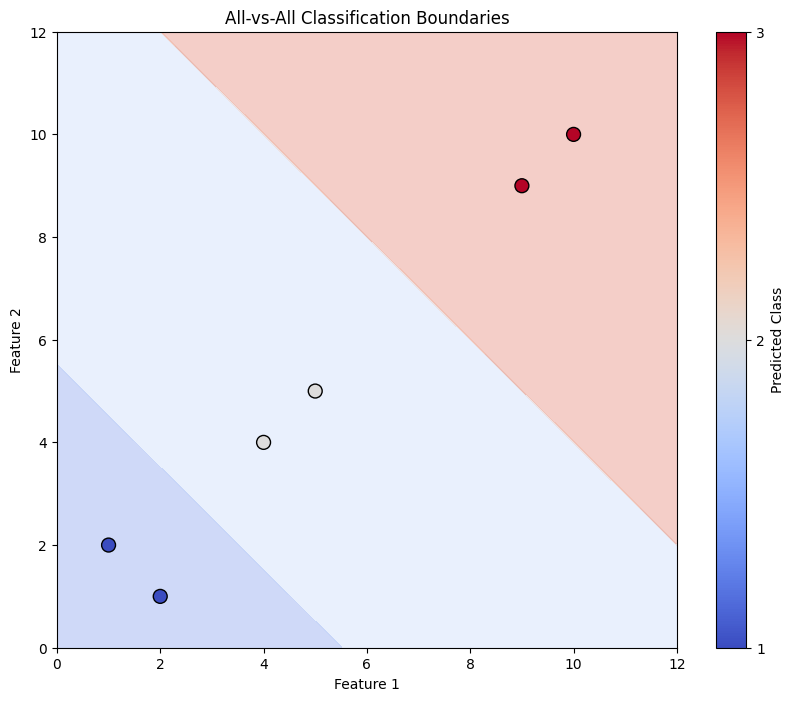

In [3]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from itertools import combinations

# Игрушечный датасет
X = np.array([
    [1.0, 2.0], [2.0, 1.0],  # Класс 1
    [4.0, 4.0], [5.0, 5.0],  # Класс 2
    [9.0, 9.0], [10.0, 10.0]  # Класс 3
])
y = np.array([1, 1, 2, 2, 3, 3])

# Все пары классов
classes = np.unique(y)
pairs = list(combinations(classes, 2))

# Словарь для хранения классификаторов
classifiers = {}

for i, j in pairs:
    # Подвыборка для классов i и j
    idx = np.where((y == i) | (y == j))
    X_ij, y_ij = X[idx], y[idx]
    # Переводим метки в {0, 1}
    y_binary = (y_ij == i).astype(int)
    clf = SVC(kernel="linear", probability=True)
    clf.fit(X_ij, y_binary)
    classifiers[(i, j)] = clf

# Визуализация границ
x_min, x_max = 0, 12
y_min, y_max = 0, 12
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Голосование для каждого класса
votes = np.zeros((grid.shape[0], len(classes)))

for (i, j), clf in classifiers.items():
    preds = clf.predict(grid)
    votes[:, i - 1] += preds == 1  # Голос за i
    votes[:, j - 1] += preds == 0  # Голос за j

# Итоговые предсказания
final_predictions = classes[np.argmax(votes, axis=1)].reshape(xx.shape)

# Визуализация
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, final_predictions, alpha=0.3, levels=len(classes), cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=100)
plt.title("All-vs-All Classification Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(ticks=classes, label="Predicted Class")
plt.show()





### **Выводы**  
Метод "все против всех" обеспечивает более сложное разделение классов, но:  
- Сложен в реализации для большого числа классов.  
- Возникают неоднозначные области, где невозможно сделать однозначное предсказание.  

Для крупных задач лучше подходят методы, использующие общее представление, например, **softmax** в нейронных сетях.



Давайте подробно рассмотрим оба подхода (One-versus-All и All-versus-All) с числовыми примерами, включая формулы, расчёты и объяснения.  



## **One-vs-All: Один против всех**

### Условие задачи:
Имеются три класса данных:  
- $C_1: (1, 1), (2, 2), (3, 3)$  
- $C_2: (-1, -1), (-2, -2), (-3, -3)$  
- $C_3: (1, -1), (2, -2), (3, -3)$  

Обучим три классификатора $b_1(x), b_2(x), b_3(x)$, где $b_k(x) = \text{sgn}(\langle w_k, x \rangle + w_{0,k})$, чтобы отличать один класс от всех остальных.



### **Обучение $b_1(x)$:**
Отличаем класс $C_1$ от остальных ($C_2, C_3$).

#### Обозначение меток:
- Для $C_1$: метка $+1$.
- Для $C_2, C_3$: метка $-1$.

**Данные и метки:**  
$$
\begin{aligned}
& (1, 1), \, \text{метка } +1 \\
& (2, 2), \, \text{метка } +1 \\
& (3, 3), \, \text{метка } +1 \\
& (-1, -1), \, \text{метка } -1 \\
& (-2, -2), \, \text{метка } -1 \\
& (-3, -3), \, \text{метка } -1 \\
& (1, -1), \, \text{метка } -1 \\
& (2, -2), \, \text{метка } -1 \\
& (3, -3), \, \text{метка } -1.
\end{aligned}
$$

#### Решение линейного классификатора:  
Мы хотим найти $w_1$ и $w_{0,1}$, которые минимизируют ошибку. Предположим, после обучения получили:  
$$
w_1 = (1, 1), \quad w_{0,1} = -3.
$$

**Итоговая функция:**  
$$
b_1(x) = \text{sgn}(\langle (1, 1), x \rangle - 3).
$$



### **Обучение $b_2(x)$:**
Отличаем класс $C_2$ от остальных ($C_1, C_3$).

#### Обозначение меток:
- Для $C_2$: метка $+1$.
- Для $C_1, C_3$: метка $-1$.

**Данные и метки:**  
$$
\begin{aligned}
& (-1, -1), \, \text{метка } +1 \\
& (-2, -2), \, \text{метка } +1 \\
& (-3, -3), \, \text{метка } +1 \\
& (1, 1), \, \text{метка } -1 \\
& (2, 2), \, \text{метка } -1 \\
& (3, 3), \, \text{метка } -1 \\
& (1, -1), \, \text{метка } -1 \\
& (2, -2), \, \text{метка } -1 \\
& (3, -3), \, \text{метка } -1.
\end{aligned}
$$

#### Решение линейного классификатора:  
Предположим, после обучения получили:  
$$
w_2 = (-1, -1), \quad w_{0,2} = 4.
$$

**Итоговая функция:**  
$$
b_2(x) = \text{sgn}(\langle (-1, -1), x \rangle + 4).
$$



### **Обучение $b_3(x)$:**
Отличаем класс $C_3$ от остальных ($C_1, C_2$).

#### Обозначение меток:
- Для $C_3$: метка $+1$.
- Для $C_1, C_2$: метка $-1$.

**Данные и метки:**  
$$
\begin{aligned}
& (1, -1), \, \text{метка } +1 \\
& (2, -2), \, \text{метка } +1 \\
& (3, -3), \, \text{метка } +1 \\
& (1, 1), \, \text{метка } -1 \\
& (2, 2), \, \text{метка } -1 \\
& (3, 3), \, \text{метка } -1 \\
& (-1, -1), \, \text{метка } -1 \\
& (-2, -2), \, \text{метка } -1 \\
& (-3, -3), \, \text{метка } -1.
\end{aligned}
$$

#### Решение линейного классификатора:  
Предположим, после обучения получили:  
$$
w_3 = (1, -1), \quad w_{0,3} = 0.
$$

**Итоговая функция:**  
$$
b_3(x) = \text{sgn}(\langle (1, -1), x \rangle).
$$



### **Классификация нового объекта $x = (0.5, 0.5)$:**

#### 1. Для $b_1(x)$:
$$
\langle (1, 1), (0.5, 0.5) \rangle - 3 = (1 \cdot 0.5 + 1 \cdot 0.5) - 3 = 1 - 3 = -2.
$$
$$
b_1(x) = -1 \quad (\text{не принадлежит $C_1$}).
$$

#### 2. Для $b_2(x)$:
$$
\langle (-1, -1), (0.5, 0.5) \rangle + 4 = (-1 \cdot 0.5 - 1 \cdot 0.5) + 4 = -1 + 4 = 3.
$$
$$
b_2(x) = +1 \quad (\text{принадлежит $C_2$}).
$$

#### 3. Для $b_3(x)$:
$$
\langle (1, -1), (0.5, 0.5) \rangle = (1 \cdot 0.5 - 1 \cdot 0.5) = 0.
$$
$$
b_3(x) = 0 \quad (\text{граничное значение}).
$$

**Итоговый выбор класса:**  
Наибольшее значение линейной функции достигается для $b_2(x)$, поэтому $x = (0.5, 0.5)$ относится к классу $C_2$.


### **All-vs-All: Все против всех**

В подходе All-vs-All (все против всех) строится $C(C-1)/2$ классификаторов для всех пар классов $C_i$ и $C_j$. Каждый классификатор обучается на данных только из двух классов и выдаёт метку одного из них. Затем для классификации нового объекта используется голосование всех бинарных классификаторов.



## **Данные для примера**

### Три класса:
- $C_1: (1, 1), (2, 2), (3, 3)$,
- $C_2: (-1, -1), (-2, -2), (-3, -3)$,
- $C_3: (1, -1), (2, -2), (3, -3)$.

Нужно построить три классификатора:
1. $b_{12}(x)$: отличает $C_1$ от $C_2$,
2. $b_{13}(x)$: отличает $C_1$ от $C_3$,
3. $b_{23}(x)$: отличает $C_2$ от $C_3$.



### **Обучение $b_{12}(x)$:**
Отличаем $C_1$ от $C_2$.

#### Обозначение меток:
- Для $C_1$: метка $+1$,
- Для $C_2$: метка $-1$.

**Данные и метки:**
$$
\begin{aligned}
& (1, 1), \, \text{метка } +1, \\
& (2, 2), \, \text{метка } +1, \\
& (3, 3), \, \text{метка } +1, \\
& (-1, -1), \, \text{метка } -1, \\
& (-2, -2), \, \text{метка } -1, \\
& (-3, -3), \, \text{метка } -1.
\end{aligned}
$$

#### Решение линейного классификатора:
После обучения получили:
$$
w_{12} = (1, 1), \quad w_{0,12} = -3.
$$

**Итоговая функция:**
$$
b_{12}(x) = \text{sgn}(\langle (1, 1), x \rangle - 3).
$$



### **Обучение $b_{13}(x)$:**
Отличаем $C_1$ от $C_3$.

#### Обозначение меток:
- Для $C_1$: метка $+1$,
- Для $C_3$: метка $-1$.

**Данные и метки:**
$$
\begin{aligned}
& (1, 1), \, \text{метка } +1, \\
& (2, 2), \, \text{метка } +1, \\
& (3, 3), \, \text{метка } +1, \\
& (1, -1), \, \text{метка } -1, \\
& (2, -2), \, \text{метка } -1, \\
& (3, -3), \, \text{метка } -1.
\end{aligned}
$$

#### Решение линейного классификатора:
После обучения получили:
$$
w_{13} = (1, -1), \quad w_{0,13} = 0.
$$

**Итоговая функция:**
$$
b_{13}(x) = \text{sgn}(\langle (1, -1), x \rangle).
$$



### **Обучение $b_{23}(x)$:**
Отличаем $C_2$ от $C_3$.

#### Обозначение меток:
- Для $C_2$: метка $+1$,
- Для $C_3$: метка $-1$.

**Данные и метки:**
$$
\begin{aligned}
& (-1, -1), \, \text{метка } +1, \\
& (-2, -2), \, \text{метка } +1, \\
& (-3, -3), \, \text{метка } +1, \\
& (1, -1), \, \text{метка } -1, \\
& (2, -2), \, \text{метка } -1, \\
& (3, -3), \, \text{метка } -1.
\end{aligned}
$$

#### Решение линейного классификатора:
После обучения получили:
$$
w_{23} = (-1, -1), \quad w_{0,23} = 4.
$$

**Итоговая функция:**
$$
b_{23}(x) = \text{sgn}(\langle (-1, -1), x \rangle + 4).
$$



### **Классификация нового объекта $x = (0.5, 0.5)$:**

#### 1. Для $b_{12}(x)$:
$$
\langle (1, 1), (0.5, 0.5) \rangle - 3 = (1 \cdot 0.5 + 1 \cdot 0.5) - 3 = 1 - 3 = -2.
$$
$$
b_{12}(x) = -1 \quad (\text{голос за } C_2).
$$

#### 2. Для $b_{13}(x)$:
$$
\langle (1, -1), (0.5, 0.5) \rangle = (1 \cdot 0.5 - 1 \cdot 0.5) = 0.
$$
$$
b_{13}(x) = 0 \quad (\text{граничное значение, не влияет на итоговый голос}).
$$

#### 3. Для $b_{23}(x)$:
$$
\langle (-1, -1), (0.5, 0.5) \rangle + 4 = (-1 \cdot 0.5 - 1 \cdot 0.5) + 4 = -1 + 4 = 3.
$$
$$
b_{23}(x) = +1 \quad (\text{голос за } C_2).
$$



### **Голоса за классы:**
- $C_1: 0$ голосов,
- $C_2: 2$ голоса ($b_{12}, b_{23}$),
- $C_3: 0$ голосов.

### **Итоговая классификация:**
Объект $x = (0.5, 0.5)$ относится к классу $C_2$.



### **Особенность подхода:**
Если голоса распределяются равномерно (например, $1, 1, 1$), объект оказывается на границе, и требуется дополнительная процедура для разрешения конфликта.



#Многоклассовая логистическая регрессия

Многоклассовая логистическая регрессия — это обобщение бинарной логистической регрессии на случай более чем двух классов. Рассмотрим, как это можно сделать.

В бинарной логистической регрессии мы строим линейную модель для двух классов:

$$
b(x) = \langle w, x \rangle + w_0,
$$

где $\langle w, x \rangle$ — скалярное произведение вектора признаков $x$ и вектора весов $w$, а $w_0$ — смещение. Прогноз этой модели затем переводится в вероятность с помощью сигмоидной функции:

$$
\sigma(z) = \frac{1}{1 + \exp(-z)}.
$$

Теперь представим, что нам нужно решить задачу классификации с $K$ классами. В этом случае для каждого класса мы строим линейную модель, в которой $b_k(x)$ — это линейная комбинация признаков для $k$-го класса:

$$
b_k(x) = \langle w_k, x \rangle + w_{0k},
$$

где $b_k(x)$ — это оценка принадлежности объекта $x$ к классу $k$. У нас есть $K$ таких моделей, и для каждой мы получаем оценку $b_k(x)$. Теперь нужно перевести эти оценки в вероятности принадлежности к каждому классу.

Для этого используется функция **softmax**, которая нормирует вектор значений $b_1(x), \dots, b_K(x)$ и преобразует их в вероятности:

$$
\text{softmax}(z_1, \dots, z_K) = \left( \frac{\exp(z_1)}{\sum_{k=1}^{K} \exp(z_k)}, \dots, \frac{\exp(z_K)}{\sum_{k=1}^{K} \exp(z_K)} \right).
$$

То есть, вероятность того, что объект $x$ принадлежит классу $k$, вычисляется по формуле:

$$
P(y = k \mid x, w) = \frac{\exp(\langle w_k, x \rangle + w_{0k})}{\sum_{j=1}^{K} \exp(\langle w_j, x \rangle + w_{0j})}.
$$

Теперь необходимо обучить параметры весов $w_1, w_2, \dots, w_K$ с использованием метода максимального правдоподобия. Подход аналогичен бинарной логистической регрессии, только теперь мы максимизируем логарифм правдоподобия для многоклассовой задачи:

$$
\sum_{i=1}^{N} \log P(y = y_i \mid x_i, w) \rightarrow \max_{w_1, \dots, w_K}.
$$

Здесь $y_i$ — это истинный класс для объекта $x_i$, и задача обучения сводится к нахождению весов $w_1, w_2, \dots, w_K$, которые максимизируют это правдоподобие.

Таким образом, многоклассовая логистическая регрессия обобщает идею бинарной логистической регрессии, используя несколько линейных моделей и функцию softmax для преобразования линейных оценок в вероятности.


**Масштабируемость линейных моделей**

Мы уже обсуждали, что метод стохастического градиентного спуска (SGD) позволяет обучению эффективно масштабироваться с увеличением числа объектов, так как можно обрабатывать данные частями, не загружая их целиком в оперативную память. Но что делать, если признаков слишком много, или их количество заранее неизвестно? Это может быть актуально в следующих ситуациях:

1. **Классификация текстов**: Текст можно представить как "мешок слов", то есть набор всех слов, встречающихся в тексте, без учета порядка. Например, для задачи определения тональности отзыва в интернете, наличие каждого слова будет представлено отдельной фичей. В этом случае размерность обучающей выборки может достигать сотен тысяч признаков.
   
2. **Предсказание кликов по рекламе**: В этой задаче количество признаков может быть очень большим. Например, можно использовать индикаторы, показывающие, что пользователь X посетил веб-страницу Y. В такой задаче размерность признаков может составить порядка $10^9 \times 10^7 = 10^{16}$, и при этом появляются новые пользователи и страницы, что также увеличивает число признаков в процессе работы модели.

Для решения таких проблем существуют несколько методов, которые позволяют эффективно работать с большими данными:

### 1. Разреженное кодирование

Даже если размерность объекта в выборке очень велика, количество ненулевых элементов в нем может быть невелико. Например, в задаче с текстом или предсказанием кликов, где большинство признаков будут равны нулю, можно использовать разреженное представление данных. Вместо того чтобы хранить полный вектор признаков, мы сохраняем только индексы и значения ненулевых элементов. Это позволяет значительно сэкономить память.

### 2. Хэширование признаков (Hashing Trick)

Для обработки очень большого числа признаков можно использовать хэширование, чтобы не хранить все веса, а вычислять их динамически. Вместо того чтобы хранить отдельные веса для каждого признака, мы применяем хэш-функцию, которая отображает каждый признак в индекс хэш-таблицы. Это позволяет значительно уменьшить память, необходимую для хранения весов, но при этом может привести к некоторой потере качества. Например, несколько различных признаков могут иметь одинаковое значение в хэш-таблице, что может привести к некоторой потере точности модели, но обычно эта потеря минимальна и оправдана существенным снижением требований к памяти. Этот метод называется **hashing trick**.

Примером реализации разреженных данных и хэширования признаков является библиотека **Vowpal Wabbit**, которая эффективно решает такие задачи.



### 3. Использование серверов параметров (Parameter Server)

Если задача такова, что необходимо сохранить высокое качество модели (и нельзя позволить себе потерю точности из-за сжатия вектора весов), но при этом признаки слишком велики, можно решить задачу распределенно, используя **Parameter Server**. В этом случае все данные и признаки распределяются между несколькими серверами, а модель хранится в шардированных хэш-таблицах.


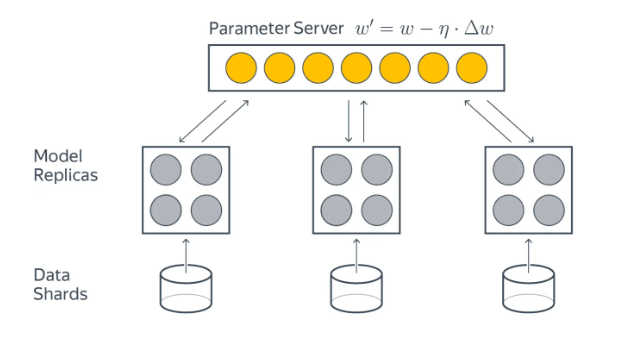


Процесс работы можно представить следующим образом:
- Желтые кружки — это серверы, которые загружают данные.
- Серые кружки — это серверы, которые хранят части модели.

Когда сервер с данными требует информацию о нужных весах для предсказания, он обращается к серверу модели, получает необходимые веса, вычисляет градиент и отправляет его обратно для обновления модели. Этот процесс позволяет эффективно масштабировать обучение, поскольку каждый сервер может работать с частью данных и модели, и таким образом система масштабируется до очень больших объемов. Однако, стоит отметить, что задачи, в которых использование такой схемы оправдано, довольно редки, и она требует дополнительных вычислительных ресурсов.

### Подытожим

Линейные модели можно рассматривать как однослойные нейросети, и многие методы, изначально разработанные для них, теперь активно используются в задачах глубокого обучения. Подходы к регрессии, классификации и оптимизации остаются аналогичными, что делает знание линейных моделей полезным и для более сложных систем.

Кроме того, ключевым выводом, который стоит усвоить, является то, что решение любой задачи машинного обучения состоит из трёх основных компонентов:
1. Выбор функции потерь.
2. Выбор параметризованного класса моделей.
3. Выбор метода оптимизации.



# Литература
1. https://www.mit.edu/~9.520/spring08/Classes/class05.pdf
2. http://machinelearning.ru/wiki/images/archive/a/a0/20150316112120!Voron-ML-Lin-SVM.pdf
3. https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture06-linclass.pdf